In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 第5章 大数定律与中心极限定理

## 1.切比雪夫不等式

## 2.大数定律
### 2.1. 切比雪夫大数定律
### 2.2. 伯努利大数定律
### 2.3. 辛钦大数定律

## 3.中心极限定理
### 3.1. 列维-林德伯格中心极限定理
### 3.2. 棣莫弗-拉普拉斯中心极限定理

In [ ]:
## 切比雪夫不等式
# $P(|X - \mu| \ge k\sigma) \le \frac{1}{k^2}$
# 离平均值超过 $k$ 个标准差的数据，最多只占 $\frac{1}{k^2}$。

均值 (Mean): 2.0012551615334209
标准差 (Std): 2.0041499466150392


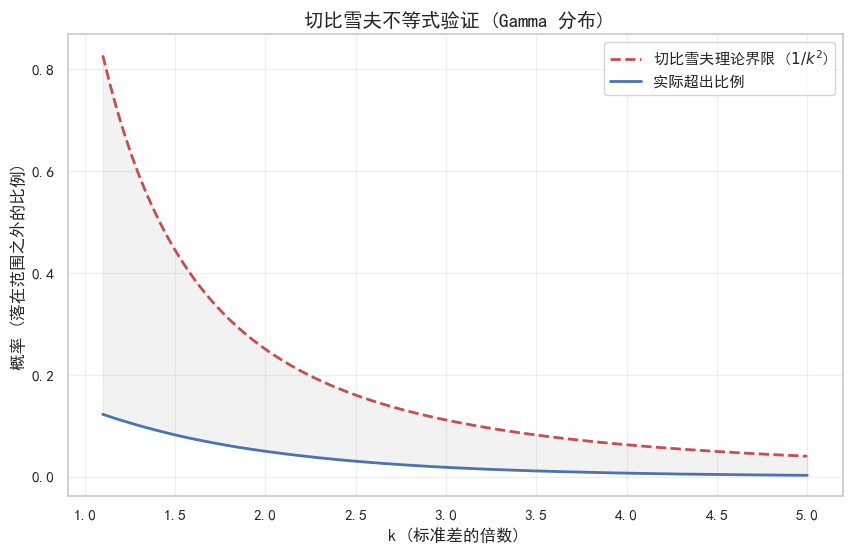

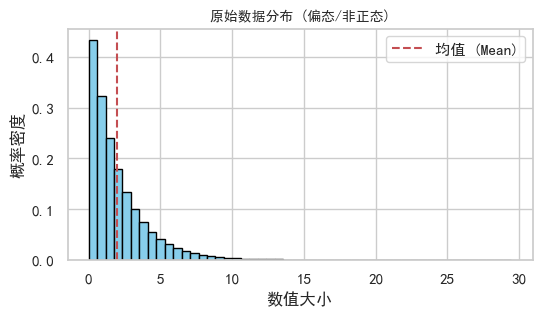

In [32]:
# 1. 建立样本 (Create Sample)
np.random.seed(78) # 锁定随机种子
n_samples = 1000000 # 定义样本量

# 故意使用一个非常偏斜的分布：Gamma分布 (shape=1, scale=2)
# 你可以把这里换成任何分布，切比雪夫不等式永远成立
data = np.random.gamma(shape=1, scale=2, size=n_samples) # 将生成的数存入data数组

# 2. 计算统计量 (Calculate Stats)
mu = np.mean(data) # 平均值
sigma = np.std(data) # 标准差

print(f"均值 (Mean): {mu:.16f}")
print(f"标准差 (Std): {sigma:.16f}")

# 3. 模拟验证 (Simulation Loop)

# 我们选取一系列的 k 值 (从 1.1 到 5)
k_values = np.linspace(1.1, 5, 100) # 1.5到5 步长为100

theoretical_bounds = [] # 准备一个空列表，存理论值 理论上的上限 (1/k^2)
actual_proportions = [] # 准备一个空列表，存实际值 实际上跑偏的比例

for k in k_values:
    # 理论上限: 1 / k^2
    bound = 1 / (k**2)
    theoretical_bounds.append(bound) # 放进theoretical_bounds.()列表中
    
    # 实际统计:
    # 也就是 |X - mu| >= k * sigma 的数据有多少？
    # np.abs(...) 取绝对值
    outliers = np.abs(data - mu) >= (k * sigma) # 使用前不需要声明？好像是的
    
    # 计算越界的比例
    actual_prop = np.mean(outliers) 
    # 对布尔值（Boolean）数组求平均值 (mean)，其实就是在算True 的比例
    actual_proportions.append(actual_prop)

# 4. 绘图 (Visualization)
plt.figure(figsize=(10, 6))

# --- 关键步骤：设置中文字体 ---
# 这一步是为了防止中文显示成乱码（小方框）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 用户通常使用 'SimHei' (黑体)
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题

# 画出理论上限（切比雪夫边界）- 红色虚线
# 把label换成中文的：plt.plot(k_values, theoretical_bounds, 'r--', linewidth=2, label=r'Chebyshev Bound ($1/k^2$)')
plt.plot(k_values, theoretical_bounds, 'r--', linewidth=2, label='切比雪夫理论界限 ($1/k^2$)')

# 画出实际数据的比例 - 蓝色实线
# 把label换成中文的：plt.plot(k_values, actual_proportions, 'b-', linewidth=2, label='Actual Proportion of Outliers')
plt.plot(k_values, actual_proportions, 'b-', linewidth=2, label='实际超出比例')

# 填充中间区域，强调实际值永远在理论值下方
plt.fill_between(k_values, actual_proportions, theoretical_bounds, color='gray', alpha=0.1)

# plt.title('Verification of Chebyshev Inequality (Gamma Distribution)', fontsize=14)
plt.title('切比雪夫不等式验证 (Gamma 分布)', fontsize=14)
# plt.xlabel('k (Number of Standard Deviations)', fontsize=12)
plt.xlabel('k (标准差的倍数)', fontsize=12)
# plt.ylabel('Probability (Proportion outside range)', fontsize=12)
plt.ylabel('概率 (落在范围之外的比例)', fontsize=12)

# 显示图例
plt.legend()
plt.grid(True, alpha=0.3)
# plt.savefig("Mathematical_statistics/images/my_figure_name.png")
plt.savefig("Mathematical_statistics/images/切比雪夫不等式验证 (Gamma 分布).png")
plt.show()

# 额外：顺便看看这个分布长什么样，证明它确实不正态
plt.figure(figsize=(6, 3))
plt.hist(data, bins=50, color='skyblue', edgecolor='black', density=True)
# plt.title('The Underlying Distribution (Skewed)', fontsize=10)
plt.title('原始数据分布 (偏态/非正态)', fontsize=10)
# plt.axvline(mu, color='r', linestyle='--', label='Mean')
plt.axvline(mu, color='r', linestyle='--', label='均值 (Mean)')
plt.xlabel('数值大小')
plt.ylabel('概率密度')
plt.legend()
# plt.savefig("Mathematical_statistics/images/my_figure_name.png")
plt.savefig("Mathematical_statistics/images/原始数据分布 (偏态或非正态).png")
plt.show()

均值 (Mean): 49.9819
标准差 (Std): 9.9984


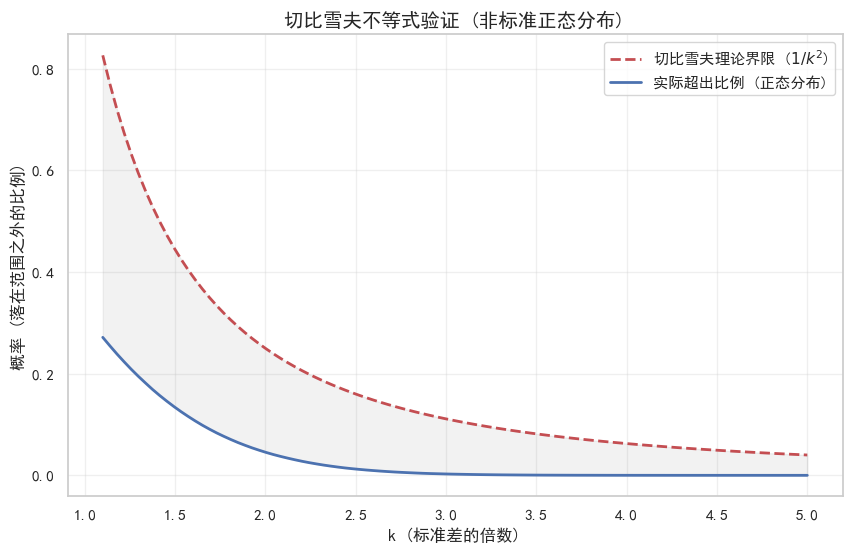

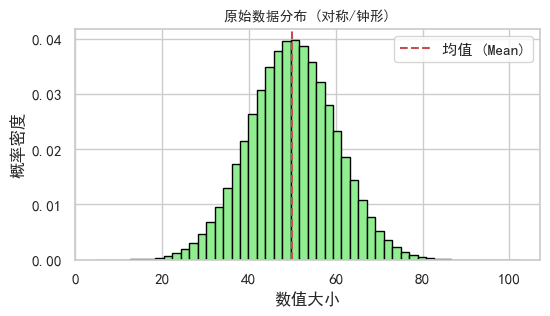

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. 建立样本 (Create Sample)
# ==========================================
np.random.seed(78) # 锁定随机种子
n_samples = 1000000 # 定义样本量

# 【改动在这里】：使用非标准正态分布 (均值 loc=50, 标准差 scale=10)
# 之前的 Gamma 是偏态的，现在这个是钟形对称的
data = np.random.normal(loc=50, scale=10, size=n_samples) 

# ==========================================
# 2. 计算统计量 (Calculate Stats)
# ==========================================
mu = np.mean(data)   # 平均值
sigma = np.std(data) # 标准差

print(f"均值 (Mean): {mu:.4f}")
print(f"标准差 (Std): {sigma:.4f}")

# ==========================================
# 3. 模拟验证 (Simulation Loop)
# ==========================================

# 我们选取一系列的 k 值 (从 1.1 到 5)
k_values = np.linspace(1.1, 5, 100) 

theoretical_bounds = [] # 准备一个空列表，存理论值 (1/k^2)
actual_proportions = [] # 准备一个空列表，存实际值

for k in k_values:
    # 理论上限: 1 / k^2
    bound = 1 / (k**2)
    theoretical_bounds.append(bound) 
    
    # 实际统计:
    # 也就是 |X - mu| >= k * sigma 的数据有多少？
    # 回答你的疑问：是的，Python中变量不需要像C语言那样提前声明类型，赋值即创建
    outliers = np.abs(data - mu) >= (k * sigma) 
    
    # 计算越界的比例
    actual_prop = np.mean(outliers) 
    # 对布尔值（Boolean）数组求平均值，就是算 True 的比例
    actual_proportions.append(actual_prop)

# ==========================================
# 4. 绘图 (Visualization)
# ==========================================
plt.figure(figsize=(10, 6))

# --- 设置中文字体 ---
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows
plt.rcParams['axes.unicode_minus'] = False    # 负号显示

# 画出理论上限（红虚线）
plt.plot(k_values, theoretical_bounds, 'r--', linewidth=2, label='切比雪夫理论界限 ($1/k^2$)')

# 画出实际数据的比例（蓝实线）
plt.plot(k_values, actual_proportions, 'b-', linewidth=2, label='实际超出比例 (正态分布)')

# 填充中间区域
plt.fill_between(k_values, actual_proportions, theoretical_bounds, color='gray', alpha=0.1)

plt.title('切比雪夫不等式验证 (非标准正态分布)', fontsize=14)
plt.xlabel('k (标准差的倍数)', fontsize=12)
plt.ylabel('概率 (落在范围之外的比例)', fontsize=12)

plt.legend()
plt.grid(True, alpha=0.3)

# plt.savefig("Mathematical_statistics/images/my_figure_name.png")
plt.savefig("Mathematical_statistics/images/切比雪夫不等式验证 (非标准正态分布).png")
plt.show()

# ==========================================
# 额外：查看分布形状
# ==========================================
plt.figure(figsize=(6, 3))
plt.hist(data, bins=50, color='lightgreen', edgecolor='black', density=True) # 换个颜色区分一下

plt.title('原始数据分布 (对称/钟形)', fontsize=10)
plt.axvline(mu, color='r', linestyle='--', label='均值 (Mean)')
plt.xlabel('数值大小')
plt.ylabel('概率密度')
plt.legend()
# plt.savefig("Mathematical_statistics/images/my_figure_name.png")
plt.savefig("Mathematical_statistics/images/原始数据分布 (对称或钟形).png")
plt.show()

均值 (Mean): 49.9819
标准差 (Std): 9.9984


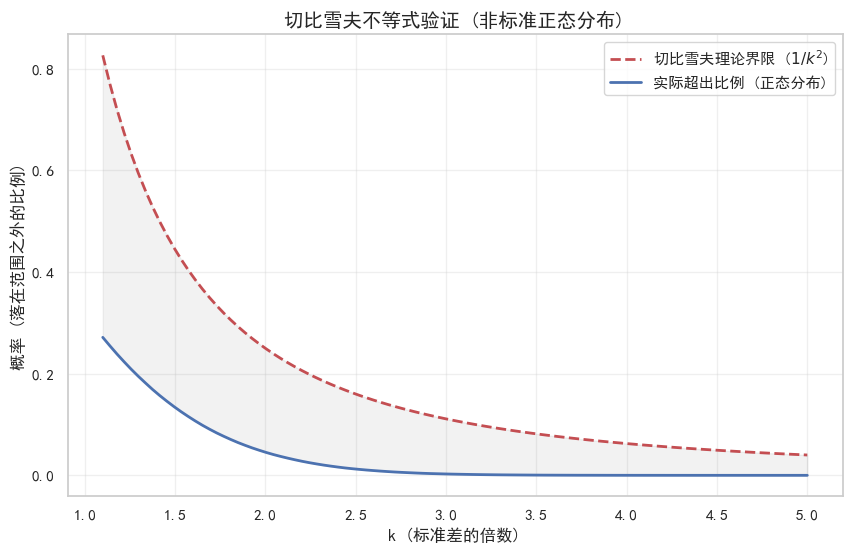

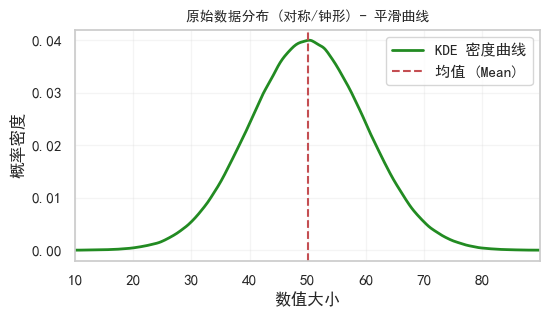

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # 【新增】引入pandas用于画光滑曲线

# ==========================================
# 1. 建立样本 (Create Sample)
# ==========================================
np.random.seed(78) # 锁定随机种子
n_samples = 1000000 # 定义样本量

# 使用非标准正态分布 (均值 loc=50, 标准差 scale=10)
data = np.random.normal(loc=50, scale=10, size=n_samples) 

# ==========================================
# 2. 计算统计量 (Calculate Stats)
# ==========================================
mu = np.mean(data)   # 平均值
sigma = np.std(data) # 标准差

print(f"均值 (Mean): {mu:.4f}")
print(f"标准差 (Std): {sigma:.4f}")

# ==========================================
# 3. 模拟验证 (Simulation Loop)
# ==========================================

k_values = np.linspace(1.1, 5, 100) 
theoretical_bounds = [] 
actual_proportions = [] 

for k in k_values:
    # 理论上限: 1 / k^2
    bound = 1 / (k**2)
    theoretical_bounds.append(bound) 
    
    # 实际统计
    outliers = np.abs(data - mu) >= (k * sigma) 
    
    # 计算越界的比例
    actual_prop = np.mean(outliers) 
    actual_proportions.append(actual_prop)

# ==========================================
# 4. 绘图 (Visualization) - 切比雪夫验证
# ==========================================
plt.figure(figsize=(10, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

# 画出理论上限（红虚线）
plt.plot(k_values, theoretical_bounds, 'r--', linewidth=2, label='切比雪夫理论界限 ($1/k^2$)')

# 画出实际数据的比例（蓝实线）
plt.plot(k_values, actual_proportions, 'b-', linewidth=2, label='实际超出比例 (正态分布)')

# 填充中间区域
plt.fill_between(k_values, actual_proportions, theoretical_bounds, color='gray', alpha=0.1)

plt.title('切比雪夫不等式验证 (非标准正态分布)', fontsize=14)
plt.xlabel('k (标准差的倍数)', fontsize=12)
plt.ylabel('概率 (落在范围之外的比例)', fontsize=12)

plt.legend()
plt.grid(True, alpha=0.3)
# plt.savefig("Mathematical_statistics/images/my_figure_name.png")
plt.savefig("Mathematical_statistics/images/切比雪夫不等式验证 (非标准正态分布)1.png")
plt.show()

# ==========================================
# 【改动部分】额外：查看分布形状 (使用 Pandas KDE)
# ==========================================
plt.figure(figsize=(6, 3))

# 1. 将 Numpy 数组转换为 Pandas Series
s = pd.Series(data)

# 2. 使用 Pandas 内置的 plot 接口画平滑曲线
# kind='kde' 表示核密度估计 (Kernel Density Estimation)
# lw=2 设置线宽
s.plot(kind='kde', color='forestgreen', lw=2, label='KDE 密度曲线')

plt.title('原始数据分布 (对称/钟形) - 平滑曲线', fontsize=10)

# 画均值线
plt.axvline(mu, color='r', linestyle='--', label='均值 (Mean)')

# 设置标签
plt.xlabel('数值大小')
plt.ylabel('概率密度')

# 限制一下X轴的范围，让图看起来更紧凑 (可选)
plt.xlim(mu - 4*sigma, mu + 4*sigma)

plt.legend()
plt.grid(True, alpha=0.2) # 加一点淡淡的网格
# plt.savefig("Mathematical_statistics/images/my_figure_name.png")
plt.savefig("Mathematical_statistics/images/原始数据分布 (对称或钟形)1.png")
plt.show()

均值 (Mean): 49.9819
标准差 (Std): 9.9984


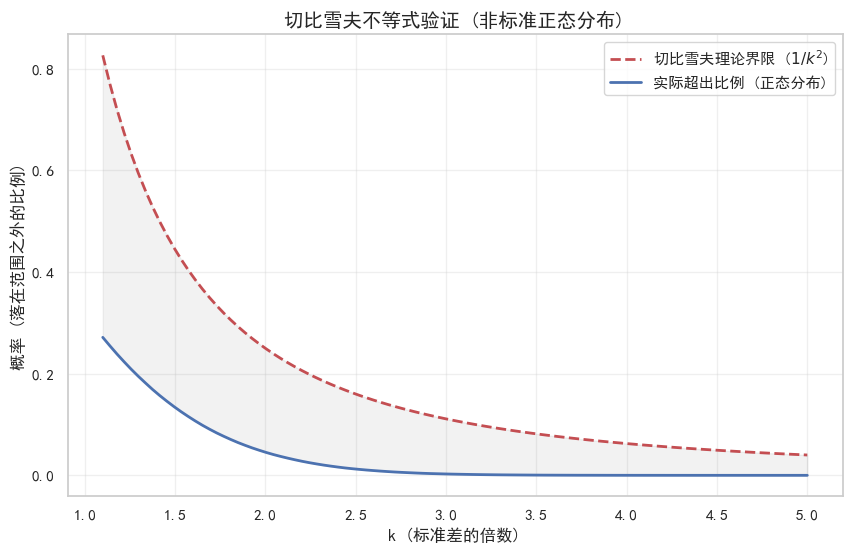

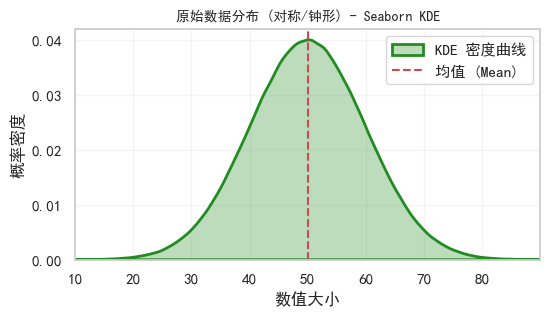

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns  # 【新增】引入 seaborn 库

# ==========================================
# 1. 建立样本 (Create Sample)
# ==========================================
np.random.seed(78) 
n_samples = 1000000 # 样本量 (注意：100万数据做KDE计算会稍微花几秒钟)

# 使用非标准正态分布 (均值 loc=50, 标准差 scale=10)
data = np.random.normal(loc=50, scale=10, size=n_samples) 

# ==========================================
# 2. 计算统计量 (Calculate Stats)
# ==========================================
mu = np.mean(data)   
sigma = np.std(data) 

print(f"均值 (Mean): {mu:.4f}")
print(f"标准差 (Std): {sigma:.4f}")

# ==========================================
# 3. 模拟验证 (Simulation Loop)
# ==========================================
k_values = np.linspace(1.1, 5, 100) 
theoretical_bounds = [] 
actual_proportions = [] 

for k in k_values:
    bound = 1 / (k**2)
    theoretical_bounds.append(bound) 
    
    outliers = np.abs(data - mu) >= (k * sigma) 
    actual_prop = np.mean(outliers) 
    actual_proportions.append(actual_prop)

# ==========================================
# 4. 绘图 (Visualization) - 切比雪夫验证
# ==========================================
plt.figure(figsize=(10, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

# 画出理论上限（红虚线）
plt.plot(k_values, theoretical_bounds, 'r--', linewidth=2, label='切比雪夫理论界限 ($1/k^2$)')

# 画出实际数据的比例（蓝实线）
plt.plot(k_values, actual_proportions, 'b-', linewidth=2, label='实际超出比例 (正态分布)')

# 填充中间区域
plt.fill_between(k_values, actual_proportions, theoretical_bounds, color='gray', alpha=0.1)

plt.title('切比雪夫不等式验证 (非标准正态分布)', fontsize=14)
plt.xlabel('k (标准差的倍数)', fontsize=12)
plt.ylabel('概率 (落在范围之外的比例)', fontsize=12)

plt.legend()
plt.grid(True, alpha=0.3)
# plt.savefig("Mathematical_statistics/images/my_figure_name.png")
plt.savefig("Mathematical_statistics/images/切比雪夫不等式验证 (非标准正态分布)2.png")
plt.show()

# ==========================================
# 【改动部分】额外：查看分布形状 (使用 Seaborn)
# ==========================================
plt.figure(figsize=(6, 3))

# 使用 Seaborn 的 kdeplot
# data: 直接传入 numpy 数组即可
# fill=True: 填充曲线下方的颜色 (Pandas做这个很麻烦，Seaborn一键搞定)
# alpha=0.3: 透明度
sns.kdeplot(data, color='forestgreen', fill=True, alpha=0.3, linewidth=2, label='KDE 密度曲线')

plt.title('原始数据分布 (对称/钟形) - Seaborn KDE', fontsize=10)

# 画均值线
plt.axvline(mu, color='r', linestyle='--', label='均值 (Mean)')

# 设置标签
plt.xlabel('数值大小')
plt.ylabel('概率密度')

# 限制一下X轴的范围，让图看起来更紧凑
plt.xlim(mu - 4*sigma, mu + 4*sigma)

plt.legend()
plt.grid(True, alpha=0.2)
# plt.savefig("Mathematical_statistics/images/my_figure_name.png")
plt.savefig("Mathematical_statistics/images/原始数据分布 (对称或钟形) - Seaborn KDE'.png")
plt.show()

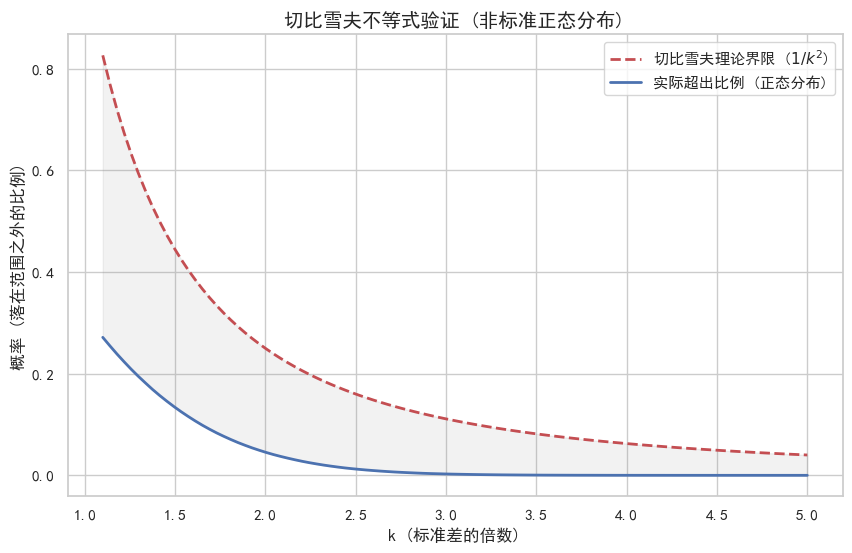

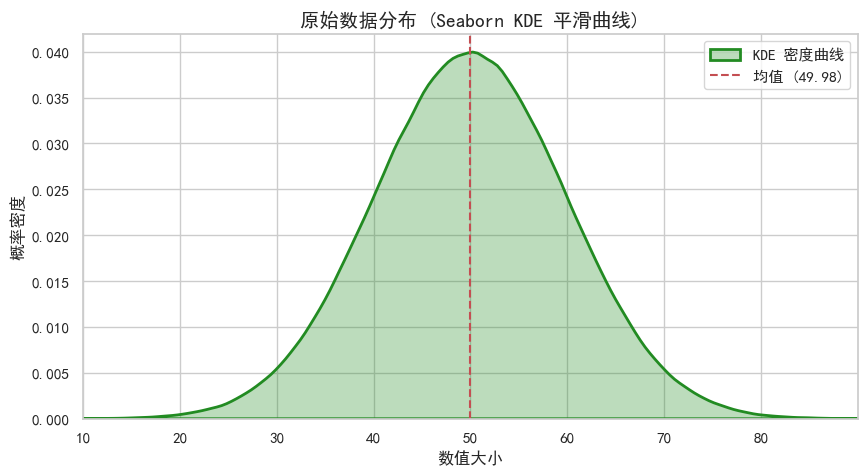

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 0. 数据准备 (Data Preparation)
# ==========================================
np.random.seed(78)
n_samples = 1000000 

# 生成非标准正态分布数据
data = np.random.normal(loc=50, scale=10, size=n_samples) 

# 计算统计量
mu = np.mean(data)
sigma = np.std(data)

# 计算切比雪夫验证所需的数据 (k值, 理论值, 实际值)
k_values = np.linspace(1.1, 5, 100) 
theoretical_bounds = [1 / (k**2) for k in k_values]
actual_proportions = [np.mean(np.abs(data - mu) >= (k * sigma)) for k in k_values]

# ==========================================
# 绘图部分：应用“搭台 -> 唱戏 -> 收尾”模式
# ==========================================

# 设置全局字体 (Matplotlib 负责基础设施)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set_theme(style="whitegrid", font='SimHei') # 让 Seaborn 也同步风格

# ------------------------------------------
# 图 1：切比雪夫不等式验证 (折线图)
# 注：折线图这种涉及简单数组对比的，Matplotlib 也就是"唱戏"的主力
# ------------------------------------------
# 1. Matplotlib 搭台
plt.figure(figsize=(10, 6))

# 2. 核心绘图 (这里用 plt 画线更直接，配合 fill_between)
plt.plot(k_values, theoretical_bounds, 'r--', linewidth=2, label='切比雪夫理论界限 ($1/k^2$)')
plt.plot(k_values, actual_proportions, 'b-', linewidth=2, label='实际超出比例 (正态分布)')
plt.fill_between(k_values, actual_proportions, theoretical_bounds, color='gray', alpha=0.1)

# 3. Matplotlib 收尾
plt.title('切比雪夫不等式验证 (非标准正态分布)', fontsize=14)
plt.xlabel('k (标准差的倍数)', fontsize=12)
plt.ylabel('概率 (落在范围之外的比例)', fontsize=12)
plt.legend()
plt.show()

# ------------------------------------------
# 图 2：分布形状查看 (KDE 密度图)
# 注：这是 Seaborn 大显身手的地方，完美体现你的“完美组合”
# ------------------------------------------
# 1. Matplotlib 负责搭台 (设置画布大小)
plt.figure(figsize=(10, 5))

# 2. Seaborn 负责唱戏 (核心统计绘图)
#   - data: 直接传 Numpy 数组
#   - fill=True: 填充颜色
#   - color: 选个漂亮的颜色
sns.kdeplot(data, fill=True, color='forestgreen', alpha=0.3, linewidth=2, label='KDE 密度曲线')

# 3. Matplotlib 负责收尾 (修饰细节)
plt.axvline(mu, color='r', linestyle='--', label=f'均值 ({mu:.2f})') # 加辅助线
plt.title('原始数据分布 (Seaborn KDE 平滑曲线)', fontsize=14)
plt.xlabel('数值大小', fontsize=12)
plt.ylabel('概率密度', fontsize=12)
plt.xlim(mu - 4*sigma, mu + 4*sigma) # 限制视野，聚焦核心区域
plt.legend()
plt.show()

In [27]:
print('''
# =========================================================================
# 蒙特卡洛模拟验证逻辑总结 (Monte Carlo Simulation Logic)
# 核心思想：暴力生成大数据 -> 计算真实统计量 -> 遍历不同阈值(k)进行比对
# =========================================================================
#
# 1. 第一阶段：【造上帝视角】(建立样本 / Create Sample)
#    - 目的：生成一个足够大的“总体”来模拟真实世界的分布。
#    - 操作：np.random.gamma(...) 或 normal(...) 生成100万个数据。
#    - 关键：样本量(n)要足够大 (如100万)，以消除偶然误差，确保模拟接近真实概率。
#    - 策略：故意选择“非正态”分布 (如Gamma)，以证明切比雪夫不等式的通用性。
#
# 2. 第二阶段：【定标尺】(计算统计量 / Calculate Stats)
#    - 目的：确立衡量“离散程度”的基准单位。
#    - 操作：计算全量数据的均值 (mu) 和标准差 (sigma)。
#    - 意义：后续所有的判断标准，不是看绝对数值，而是看“距离均值由几个标准差”。
#
# 3. 第三阶段：【压力测试】(模拟验证循环 / Simulation Loop)
#    - 目的：在不同的严格程度 (k值) 下，对比“理论上限”与“实际表现”。
#    - 逻辑：让 k 从 1.1 变到 5 (意味着容忍范围越来越宽，越界越来越难)。
#    - A. 理论动作：直接套公式 bound = 1/k^2。这是切比雪夫给出的“最坏情况承诺”。
#    - B. 实际动作：
#         1. 筛选：找出所有 |X - mu| >= k*sigma 的数据点 (Outliers)。
#         2. 计数：利用 np.mean(布尔数组) 快速计算越界数据占总量的比例。
#
# 4. 结论验证：
#    - 将 theoretical_bounds (理论) 和 actual_proportions (实际) 进行对比。
#    - 只要“实际值”始终小于等于“理论值”，模拟即成功验证了定理。
#
# =========================================================================
''')


# =========================================================================
# 蒙特卡洛模拟验证逻辑总结 (Monte Carlo Simulation Logic)
# 核心思想：暴力生成大数据 -> 计算真实统计量 -> 遍历不同阈值(k)进行比对
# =========================================================================
#
# 1. 第一阶段：【造上帝视角】(建立样本 / Create Sample)
#    - 目的：生成一个足够大的“总体”来模拟真实世界的分布。
#    - 操作：np.random.gamma(...) 或 normal(...) 生成100万个数据。
#    - 关键：样本量(n)要足够大 (如100万)，以消除偶然误差，确保模拟接近真实概率。
#    - 策略：故意选择“非正态”分布 (如Gamma)，以证明切比雪夫不等式的通用性。
#
# 2. 第二阶段：【定标尺】(计算统计量 / Calculate Stats)
#    - 目的：确立衡量“离散程度”的基准单位。
#    - 操作：计算全量数据的均值 (mu) 和标准差 (sigma)。
#    - 意义：后续所有的判断标准，不是看绝对数值，而是看“距离均值由几个标准差”。
#
# 3. 第三阶段：【压力测试】(模拟验证循环 / Simulation Loop)
#    - 目的：在不同的严格程度 (k值) 下，对比“理论上限”与“实际表现”。
#    - 逻辑：让 k 从 1.1 变到 5 (意味着容忍范围越来越宽，越界越来越难)。
#    - A. 理论动作：直接套公式 bound = 1/k^2。这是切比雪夫给出的“最坏情况承诺”。
#    - B. 实际动作：
#         1. 筛选：找出所有 |X - mu| >= k*sigma 的数据点 (Outliers)。
#         2. 计数：利用 np.mean(布尔数组) 快速计算越界数据占总量的比例。
#
# 4. 结论验证：
#    - 将 theoretical_bounds (理论) 和 actual_proportio

In [26]:
print('''
=========================================================================
Python 数据可视化三种流派总结
=========================================================================
1. 流派一：Matplotlib (plt) —— "基建狂魔" (底层核心)
- 定位：画布与坐标的直接控制者，所有高级库的底层地基。
- 核心逻辑：给我坐标点 (x, y)，我负责连线，我不懂统计学。
- 优点：极高的自由度，能控制图表的每一个像素 (布局、颜色、特殊标注)。
- 缺点：代码繁琐，画统计图 (如平滑曲线) 需手动计算数学公式 (如引入 Scipy)。
- 适用场景：搭建画布 (figure)、设置标题/标签、绘制简单的折线/散点验证图。
2. 流派二：Pandas (.plot) —— "懒人快捷键" (快速预览)
- 定位：面向数据表的快捷绘图接口 (封装了 Matplotlib)。
- 核心逻辑：直接对 DataFrame/Series 操作，一行代码出图。
- 优点：速度快，无需导入额外绘图库，适合数据处理时随手查看分布。
- 缺点：定制化能力弱，默认样式较普通，深度调整仍需回调 Matplotlib。
- 适用场景：数据清洗阶段的快速检查 (Sanity Check)，非正式展示。
3. 流派三：Seaborn (sns) —— "统计专家" (分析首选)
- 定位：专为统计分析设计的高级封装库 (Matplotlib 的精修版)。
- 核心逻辑：基于统计学原理 (分布、回归、置信区间) 自动计算并绘图。
- 优点：颜值高 (默认配色/样式好)，功能强 (自动填色、自动分组)，原生支持 Numpy/Pandas。
- 缺点：对底层细节 (如坐标轴文字、辅助线) 的控制不如 Matplotlib 直接。
- 适用场景：数理统计学习、探索性数据分析 (EDA)、论文报告展示。
=========================================================================
终极建议：采用 "混合写法" (Matplotlib 搭台 + Seaborn 唱戏) 为最佳实践。
=========================================================================
''')


Python 数据可视化三种流派总结
1. 流派一：Matplotlib (plt) —— "基建狂魔" (底层核心)
- 定位：画布与坐标的直接控制者，所有高级库的底层地基。
- 核心逻辑：给我坐标点 (x, y)，我负责连线，我不懂统计学。
- 优点：极高的自由度，能控制图表的每一个像素 (布局、颜色、特殊标注)。
- 缺点：代码繁琐，画统计图 (如平滑曲线) 需手动计算数学公式 (如引入 Scipy)。
- 适用场景：搭建画布 (figure)、设置标题/标签、绘制简单的折线/散点验证图。
2. 流派二：Pandas (.plot) —— "懒人快捷键" (快速预览)
- 定位：面向数据表的快捷绘图接口 (封装了 Matplotlib)。
- 核心逻辑：直接对 DataFrame/Series 操作，一行代码出图。
- 优点：速度快，无需导入额外绘图库，适合数据处理时随手查看分布。
- 缺点：定制化能力弱，默认样式较普通，深度调整仍需回调 Matplotlib。
- 适用场景：数据清洗阶段的快速检查 (Sanity Check)，非正式展示。
3. 流派三：Seaborn (sns) —— "统计专家" (分析首选)
- 定位：专为统计分析设计的高级封装库 (Matplotlib 的精修版)。
- 核心逻辑：基于统计学原理 (分布、回归、置信区间) 自动计算并绘图。
- 优点：颜值高 (默认配色/样式好)，功能强 (自动填色、自动分组)，原生支持 Numpy/Pandas。
- 缺点：对底层细节 (如坐标轴文字、辅助线) 的控制不如 Matplotlib 直接。
- 适用场景：数理统计学习、探索性数据分析 (EDA)、论文报告展示。
终极建议：采用 "混合写法" (Matplotlib 搭台 + Seaborn 唱戏) 为最佳实践。



In [25]:
print('''
=========================================================================
混合绘图逻辑总结 (Matplotlib + Seaborn)
核心思想：Matplotlib 搭台 -> Seaborn 唱戏 -> Matplotlib 收尾
=========================================================================
1. 第一阶段：【搭台】(使用 Matplotlib / plt)
- 任务：创建“容器”和“基础设施”。
- 操作：使用 plt.figure(figsize=...) 设定画布的长宽。
- 操作：设置全局字体 (rcParams) 以支持中文显示。
2. 第二阶段：【唱戏】(使用 Seaborn / sns)
- 任务：绘制核心的统计图形。
- 原因：Seaborn 擅长处理统计计算 (如KDE平滑) 和 自动美化 (如颜色填充)。
- 操作：调用 sns.kdeplot(data, fill=True, ...) 或 sns.boxplot(...)。
- 注意：只传数据和样式参数，不要在这里纠结坐标轴细节。
3. 第三阶段：【收尾】(使用 Matplotlib / plt)
- 任务：精细修饰、添加辅助信息、控制视野。
- 原因：Seaborn 缺乏对特定辅助线 (如均值线) 和底层细节的直接控制。
- 操作：使用 plt.axvline(...) 画平均值线、临界值线。
- 操作：使用 plt.title(), plt.xlabel() 添加描述文本。
- 操作：使用 plt.xlim() 裁剪不必要的空白区域。
- 操作：最后使用 plt.legend() 和 plt.show() 输出图像。
=========================================================================
''')


混合绘图逻辑总结 (Matplotlib + Seaborn)
核心思想：Matplotlib 搭台 -> Seaborn 唱戏 -> Matplotlib 收尾
1. 第一阶段：【搭台】(使用 Matplotlib / plt)
- 任务：创建“容器”和“基础设施”。
- 操作：使用 plt.figure(figsize=...) 设定画布的长宽。
- 操作：设置全局字体 (rcParams) 以支持中文显示。
2. 第二阶段：【唱戏】(使用 Seaborn / sns)
- 任务：绘制核心的统计图形。
- 原因：Seaborn 擅长处理统计计算 (如KDE平滑) 和 自动美化 (如颜色填充)。
- 操作：调用 sns.kdeplot(data, fill=True, ...) 或 sns.boxplot(...)。
- 注意：只传数据和样式参数，不要在这里纠结坐标轴细节。
3. 第三阶段：【收尾】(使用 Matplotlib / plt)
- 任务：精细修饰、添加辅助信息、控制视野。
- 原因：Seaborn 缺乏对特定辅助线 (如均值线) 和底层细节的直接控制。
- 操作：使用 plt.axvline(...) 画平均值线、临界值线。
- 操作：使用 plt.title(), plt.xlabel() 添加描述文本。
- 操作：使用 plt.xlim() 裁剪不必要的空白区域。
- 操作：最后使用 plt.legend() 和 plt.show() 输出图像。



In [33]:
# 保存图片
# 1. 放在 plt.show() 之前
# 2. dpi=300: 高清分辨率 (写论文/插PPT建议300以上)
# 3. bbox_inches='tight': 自动剪裁周围多余的白边 (非常推荐加上)
# plt.savefig('my_figure_name.png', dpi=300, bbox_inches='tight
# plt.savefig("Mathematical_statistics/images/my_figure_name.png")
# ***注意保存的路径和文件名：路径内使用正斜杠：/ 文件名内不要出现斜杠：/或\

In [ ]:
## 2.大数定律
### 2.1. 切比雪夫大数定律

In [ ]:
### 切比雪夫大数定律 （狭义版）
# 极限表达式： $$\lim_{n \to \infty} P\left( |\bar{X}_n - \mu| < \epsilon \right) = 1$$

In [48]:
print('''
步骤,变量/动作,含义
1. 规则,固定 ϵ (例如 0.5),定义“离平均值多近才算赢”
2. 变量,n 从小变大,模拟 n→∞ 的过程
3. 计算,对每个 n 重复 1000 次,统计“赢”的频率，作为概率 P
4. 验证,观察 P 是否趋近 1,验证极限 limP=1
''')


步骤,变量/动作,含义
1. 规则,固定 ϵ (例如 0.5),定义“离平均值多近才算赢”
2. 变量,n 从小变大,模拟 n→∞ 的过程
3. 计算,对每个 n 重复 1000 次,统计“赢”的频率，作为概率 P
4. 验证,观察 P 是否趋近 1,验证极限 limP=1



总体均值 (mu): 50.0
总体标准差 (sigma): 10.0
开始模拟 (Epsilon=2.0)...
图片已保存至: Mathematical_statistics/images/大数定律（狭义版）极限验证_正态分布_Normal_Dist.png


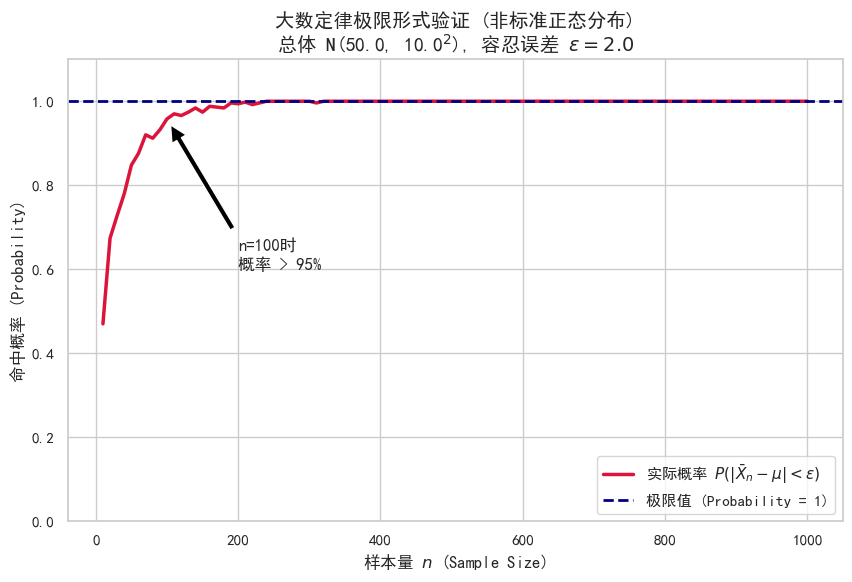

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 0. 准备工作
# ==========================================
np.random.seed(42)

# 【改动 1】定义总体：使用非标准正态分布
# 均值=50，标准差=10 (波动比较大)
pop_mu = 50.0
pop_sigma = 10.0

print(f"总体均值 (mu): {pop_mu}")
print(f"总体标准差 (sigma): {pop_sigma}")

# ==========================================
# 1. 设定参数
# ==========================================
# 【改动 2】误差容忍度 epsilon
# 之前是 1.0，但因为现在标准差很大(10)，如果 epsilon 太小，
# 需要极大的样本量才能收敛。这里我们设为 2.0 (即允许误差在 ±2 以内)
epsilon = 2.0  

# 样本量 n 的变化序列 (从 10 到 1000)
n_values = np.arange(10, 1010, 10) 

# 蒙特卡洛模拟次数 (重复做500次实验算概率)
M_trials = 500 

probabilities = []

# ==========================================
# 2. & 3. 循环计算 (矩阵化加速)
# ==========================================
print(f"开始模拟 (Epsilon={epsilon})...")

for n in n_values:
    # 【改动 3】生成正态分布样本
    # size=(M_trials, n) -> 生成 500行 x n列 的矩阵
    samples = np.random.normal(loc=pop_mu, scale=pop_sigma, size=(M_trials, n))
    
    # 对每一行求均值
    sample_means = np.mean(samples, axis=1)
    
    # 判断：均值是否落在 [50-2, 50+2] 范围内
    # 成功 = 1, 失败 = 0
    success_count = np.sum(np.abs(sample_means - pop_mu) < epsilon)
    
    # 计算概率
    prob = success_count / M_trials
    probabilities.append(prob)

# ==========================================
# 4. 绘图 (Visualization) - 混合写法
# ==========================================
plt.figure(figsize=(10, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set_theme(style="whitegrid", font='SimHei')

# 绘制概率变化曲线
plt.plot(n_values, probabilities, color='crimson', linewidth=2.5, label=r'实际概率 $P(|\bar{X}_n - \mu| < \epsilon)$')

# 绘制极限目标线 (y=1)
plt.axhline(y=1.0, color='navy', linestyle='--', linewidth=2, label='极限值 (Probability = 1)')

# 标题 (使用 \\epsilon 解决转义警告)
plt.title(f'大数定律极限形式验证 (非标准正态分布)\n'
          f'总体 N({pop_mu}, {pop_sigma}$^2$), 容忍误差 $\\epsilon = {epsilon}$', fontsize=14)

plt.xlabel('样本量 $n$ (Sample Size)', fontsize=12)
plt.ylabel('命中概率 (Probability)', fontsize=12)
plt.ylim(0, 1.1) 

# 添加箭头标注收敛点
# 自动找一个概率超过 0.95 的点来标注
converge_indices = np.where(np.array(probabilities) > 0.95)[0]
if len(converge_indices) > 0:
    idx = converge_indices[0] # 第一个达到 95% 的位置
    plt.annotate(f'n={n_values[idx]}时\n概率 > 95%', 
                 xy=(n_values[idx], probabilities[idx]), 
                 xytext=(n_values[idx]+100, 0.6),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend(loc='lower right')

# 【改动 4】保存文件，带上特殊记号防止冲突
# 记号：_Normal_Dist
save_path = "Mathematical_statistics/images/大数定律（狭义版）极限验证_正态分布_Normal_Dist.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

print(f"图片已保存至: {save_path}")
plt.show()

In [ ]:
### 切比雪夫大数定律 （广义版）

In [57]:
print(
'''
步骤,变量/动作,含义
1. 设定,"生成参数序列 μi​,σi​ (需方差有界)",构造“独立不同分布”的复杂环境 (每个 Xi​ 个性不同)
2. 变量,n 从小变大,模拟序列长度无限延伸 (n→∞)
3. 计算,算出 Xˉn​ (实测均值) 与 μˉ​n​ (理论均值),关键差异：靶心 μˉ​n​=n1​∑μi​ 是动态变化的
4. 判定,统计 $,\\bar{X}_n - \\bar{\\mu}_n
5. 验证,观察 P→1,证明：即使出身(分布)各不相同，集体(均值)依然走向有序
''')


步骤,变量/动作,含义
1. 设定,"生成参数序列 μi​,σi​ (需方差有界)",构造“独立不同分布”的复杂环境 (每个 Xi​ 个性不同)
2. 变量,n 从小变大,模拟序列长度无限延伸 (n→∞)
3. 计算,算出 Xˉn​ (实测均值) 与 μˉ​n​ (理论均值),关键差异：靶心 μˉ​n​=n1​∑μi​ 是动态变化的
4. 判定,统计 $,\bar{X}_n - \bar{\mu}_n
5. 验证,观察 P→1,证明：即使出身(分布)各不相同，集体(均值)依然走向有序



序列前5个变量的分布参数：
X_1 ~ N(μ=-2.51, σ=2.05)
X_2 ~ N(μ=9.01, σ=1.99)
X_3 ~ N(μ=4.64, σ=4.63)
X_4 ~ N(μ=1.97, σ=2.00)
X_5 ~ N(μ=-6.88, σ=2.09)

开始广义模拟 (Epsilon=0.5)...
验证完成，图片已保存: Mathematical_statistics/images/广义切比雪夫大数定律_独立非同分布.png


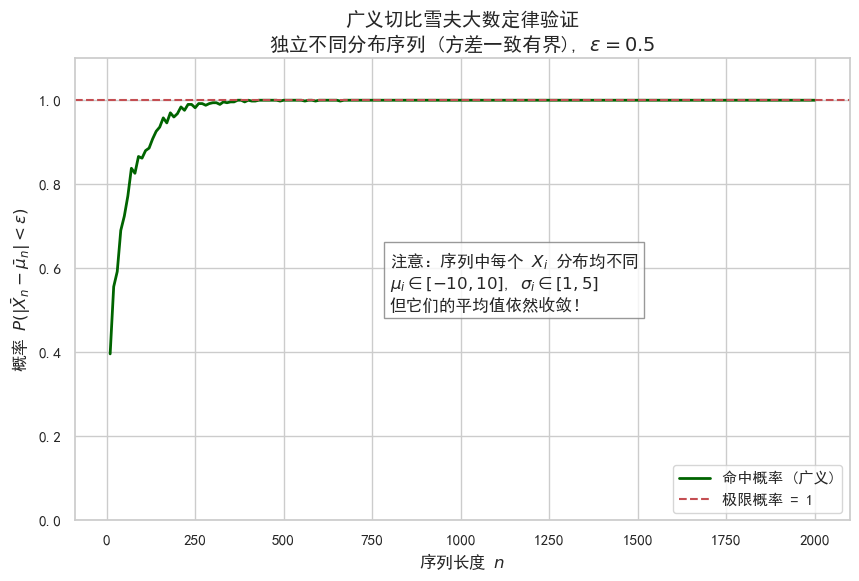

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 0. 准备工作：构建非同分布序列参数
# ==========================================
np.random.seed(42)

max_n = 2000  # 最大序列长度
epsilon = 0.5 # 容忍误差

# 【核心改变 1】构建每个位置独立的参数
# 1. 期望 mu_i: 我们可以让它随便乱跳，比如在 -10 到 10 之间随机
#    这意味着 X1 可能均值是 -5，X2 均值是 8...
seq_mu = np.random.uniform(-10, 10, size=max_n)

# 2. 标准差 sigma_i: 必须满足"一致有界"条件
#    我们设定上界 C_sqrt = 5 (即方差上界 C=25)
#    每个变量的 std 在 1 到 5 之间随机
seq_sigma = np.random.uniform(1, 5, size=max_n)

# 打印前几个看看，证明它们确实不同
print("序列前5个变量的分布参数：")
for i in range(5):
    print(f"X_{i+1} ~ N(μ={seq_mu[i]:.2f}, σ={seq_sigma[i]:.2f})")

# ==========================================
# 1. 模拟循环 (Simulation)
# ==========================================
n_values = np.arange(10, max_n + 1, 10)
probabilities = []
M_trials = 500 # 蒙特卡洛次数

print(f"\n开始广义模拟 (Epsilon={epsilon})...")

for n in n_values:
    # --- 动态目标计算 ---
    # 计算当前 n 个变量的"期望的算术平均值" (1/n * Σμ_i)
    # 这是我们收敛的目标中心，注意它随 n 变化！
    current_target_mean = np.mean(seq_mu[:n])
    
    # --- 生成非同分布样本 ---
    # 我们需要生成 M 行(实验次数) x n 列(序列长度) 的矩阵
    # 每一列 j 必须使用对应的参数 seq_mu[j] 和 seq_sigma[j]
    # Numpy 的 loc/scale 参数支持传入数组，会自动广播到每一行
    
    # loc=seq_mu[:n] 形状是 (n,)，会自动应用到 (M, n) 的每一行
    current_mu_slice = seq_mu[:n]
    current_sigma_slice = seq_sigma[:n]
    
    samples = np.random.normal(loc=current_mu_slice, scale=current_sigma_slice, size=(M_trials, n))
    
    # --- 计算样本均值 ---
    # 对每一行求平均 (1/n * ΣX_i)
    sample_means = np.mean(samples, axis=1)
    
    # --- 判定是否命中 ---
    # 核心公式: | (1/n ΣXi) - (1/n Σμi) | < epsilon
    diff = np.abs(sample_means - current_target_mean)
    success_count = np.sum(diff < epsilon)
    
    probabilities.append(success_count / M_trials)

# ==========================================
# 2. 绘图验证
# ==========================================
plt.figure(figsize=(10, 6))

# 设置样式
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", font='SimHei')

# 绘制概率曲线
plt.plot(n_values, probabilities, color='darkgreen', linewidth=2, label='命中概率 (广义)')
plt.axhline(y=1.0, color='r', linestyle='--', label='极限概率 = 1')

# 标题说明
plt.title(f'广义切比雪夫大数定律验证\n'
          f'独立不同分布序列 (方差一致有界), $\\varepsilon={epsilon}$', fontsize=14)
plt.xlabel('序列长度 $n$', fontsize=12)
plt.ylabel(r'概率 $P(|\bar{X}_n - \bar{\mu}_n| < \varepsilon)$', fontsize=12)

# 添加一段注释解释"不同分布"
# 【修改点】：\mu 改为 \\mu， \sigma 改为 \\sigma
plt.text(max_n * 0.4, 0.5, 
         f"注意：序列中每个 $X_i$ 分布均不同\n"
         f"$\\mu_i \\in [-10, 10]$, $\\sigma_i \\in [1, 5]$\n" # 注意转义字符 "\"
         f"但它们的平均值依然收敛！", 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.legend(loc='lower right')
plt.ylim(0, 1.1)

save_path = "Mathematical_statistics/images/广义切比雪夫大数定律_独立非同分布.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"验证完成，图片已保存: {save_path}")
plt.show()

正在计算概率分布...
全景图已保存: Mathematical_statistics/images/广义大数定律_多状态全景图.png


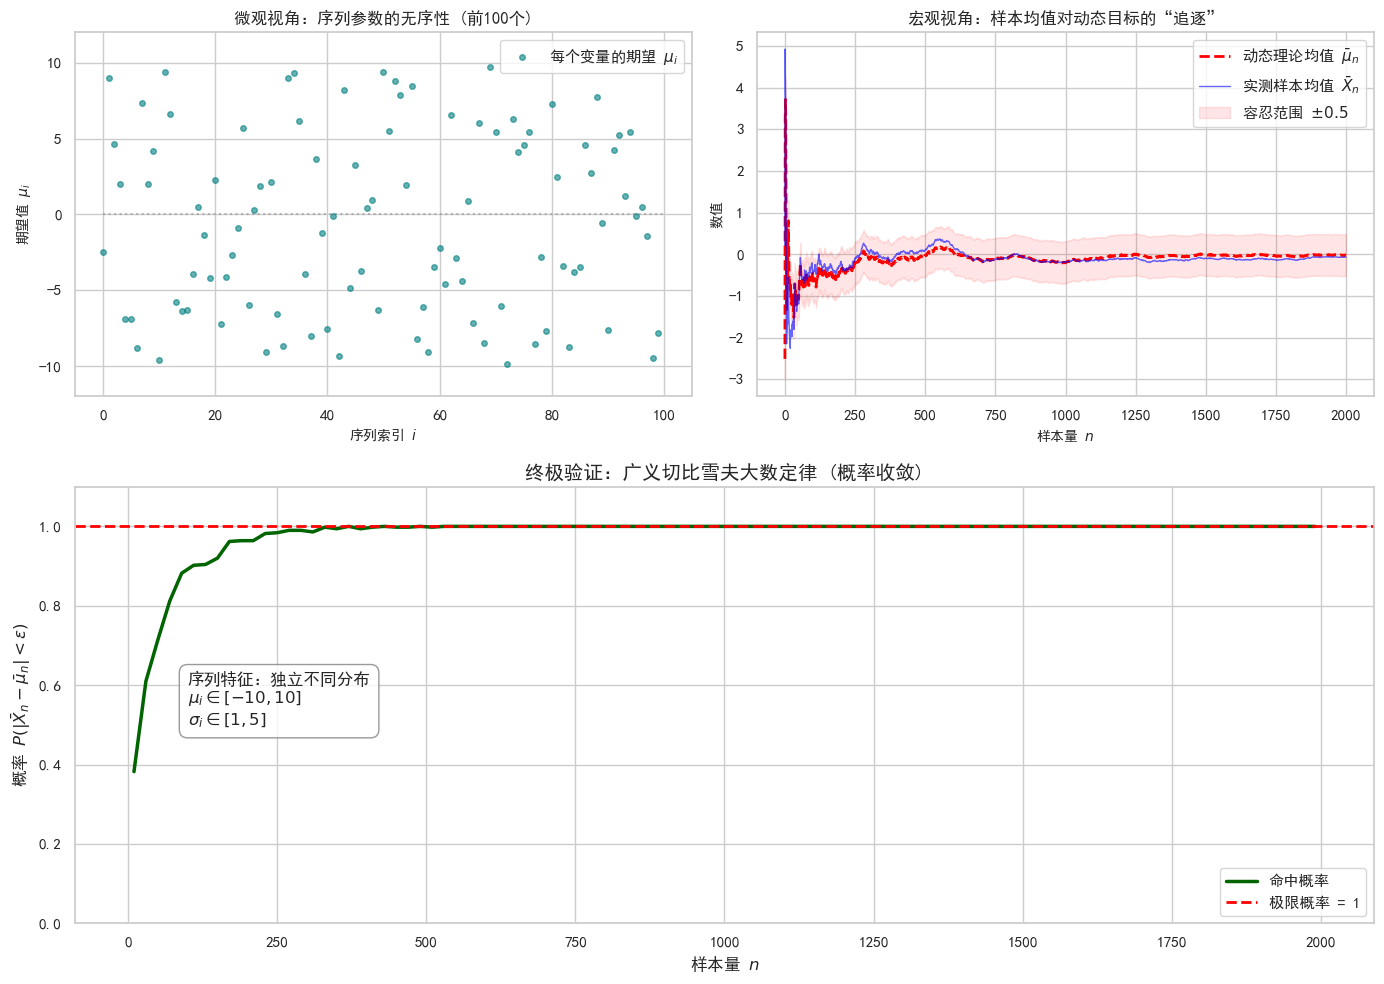

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 0. 数据准备 (Data Preparation)
# ==========================================
np.random.seed(42)
max_n = 2000
epsilon = 0.5
M_trials = 500 # 模拟次数

# 1. 生成独立的参数序列 (Chaos)
# 期望在 [-10, 10] 之间乱跳
seq_mu = np.random.uniform(-10, 10, size=max_n)
# 方差在 [1, 5] 之间乱跳 (有界)
seq_sigma = np.random.uniform(1, 5, size=max_n)

# 2. 计算动态的理论靶心 (Dynamic Target)
# target_n = (mu_1 + ... + mu_n) / n
# cumsum 是累加，除以 (1, 2, ..., n) 得到累积平均
dynamic_target_means = np.cumsum(seq_mu) / np.arange(1, max_n + 1)

# 3. 进行一次单次抽样 (为了画右上角的轨迹图)
# 生成一条样本路径，看看它具体是怎么走的
single_sample_path = np.random.normal(loc=seq_mu, scale=seq_sigma)
# 计算这条路径的累积均值
running_means = np.cumsum(single_sample_path) / np.arange(1, max_n + 1)

# 4. 概率模拟 (为了画下面的概率图)
n_values = np.arange(10, max_n + 1, 20)
probabilities = []

print("正在计算概率分布...")
for n in n_values:
    # 动态切片
    current_mus = seq_mu[:n]
    current_sigmas = seq_sigma[:n]
    target = np.mean(current_mus)
    
    # 矩阵化模拟
    samples = np.random.normal(loc=current_mus, scale=current_sigmas, size=(M_trials, n))
    sample_means = np.mean(samples, axis=1)
    
    # 判定
    success = np.sum(np.abs(sample_means - target) < epsilon)
    probabilities.append(success / M_trials)

# ==========================================
# 1. 绘图布局 (Layout Setup)
# ==========================================
# 设置风格和字体
sns.set_theme(style="whitegrid", font='SimHei')
plt.rcParams['axes.unicode_minus'] = False

# 创建画布，使用 GridSpec 进行非均匀布局
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2]) 
# height_ratios=[1, 1.2] 让下面那张图稍微高一点

# 定义三个 Axes
ax1 = fig.add_subplot(gs[0, 0]) # 左上
ax2 = fig.add_subplot(gs[0, 1]) # 右上
ax3 = fig.add_subplot(gs[1, :]) # 下方 (跨越两列)

# ==========================================
# 2. 绘制子图 (Plotting Axes)
# ==========================================

# --- 子图 1: 微观参数的混乱 (Top Left) ---
# 只画前 100 个，不然太密了看不清
subset = 100
ax1.plot(range(subset), seq_mu[:subset], 'o', markersize=4, color='teal', alpha=0.6, label='每个变量的期望 $\\mu_i$')
ax1.hlines(0, 0, subset, colors='gray', linestyles=':', alpha=0.5)
ax1.set_title('微观视角：序列参数的无序性 (前100个)', fontsize=12)
ax1.set_ylabel('期望值 $\\mu_i$', fontsize=10)
ax1.set_xlabel('序列索引 $i$', fontsize=10)
ax1.legend(loc='upper right')
ax1.set_ylim(-12, 12)

# --- 子图 2: 轨迹追逐过程 (Top Right) ---
# 展示实测均值如何追逐动态的理论均值
ax2.plot(dynamic_target_means, color='red', linestyle='--', linewidth=2, label='动态理论均值 $\\bar{\\mu}_n$')
ax2.plot(running_means, color='blue', alpha=0.6, linewidth=1, label='实测样本均值 $\\bar{X}_n$')
# 画出容忍通道 (只画最后一段，避免太乱)
ax2.fill_between(range(max_n), 
                 dynamic_target_means - epsilon, 
                 dynamic_target_means + epsilon, 
                 color='red', alpha=0.1, label=f'容忍范围 $\\pm {epsilon}$')

ax2.set_title('宏观视角：样本均值对动态目标的“追逐”', fontsize=12)
ax2.set_ylabel('数值', fontsize=10)
ax2.set_xlabel('样本量 $n$', fontsize=10)
ax2.legend(loc='upper right')

# --- 子图 3: 概率收敛曲线 (Bottom) ---
ax3.plot(n_values, probabilities, color='darkgreen', linewidth=2.5, label='命中概率')
ax3.axhline(1.0, color='red', linestyle='--', linewidth=2, label='极限概率 = 1')

ax3.set_title(f'终极验证：广义切比雪夫大数定律 (概率收敛)', fontsize=14)
ax3.set_xlabel('样本量 $n$', fontsize=12)
ax3.set_ylabel(r'概率 $P(|\bar{X}_n - \bar{\mu}_n| < \varepsilon)$', fontsize=12)
ax3.legend(loc='lower right')
ax3.set_ylim(0, 1.1)

# 添加文字说明
text_str = (f"序列特征：独立不同分布\n"
            f"$\\mu_i \\in [-10, 10]$\n"
            f"$\\sigma_i \\in [1, 5]$")
ax3.text(max_n*0.05, 0.5, text_str, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

# ==========================================
# 3. 保存与显示
# ==========================================
plt.tight_layout() # 自动调整间距，防止重叠

save_path = "Mathematical_statistics/images/广义大数定律_多状态全景图.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"全景图已保存: {save_path}")

plt.show()

In [ ]:
### 2.2. 伯努利大数定律

In [ ]:
# 伯努利大数定律
# $$\lim_{n \to \infty} P\left( \left| \frac{n_A}{n} - p \right| < \epsilon \right) = 1$$

In [47]:
print('''
步骤,变量/动作,含义
1. 设定,"p=0.6,ϵ=0.05",目标是看频率能否稳定在 0.6 附近
2. 变量,n 从小变大,模拟抛的次数越来越多
3. 计算,生成 0/1 数据 → 算频率,伯努利试验的核心：频率替代概率
4. 判定,统计频率“达标”的次数,算出一个概率 P
5. 验证,观察 P→1,验证伯努利大数定律
''')


步骤,变量/动作,含义
1. 设定,"p=0.6,ϵ=0.05",目标是看频率能否稳定在 0.6 附近
2. 变量,n 从小变大,模拟抛的次数越来越多
3. 计算,生成 0/1 数据 → 算频率,伯努利试验的核心：频率替代概率
4. 判定,统计频率“达标”的次数,算出一个概率 P
5. 验证,观察 P→1,验证伯努利大数定律



理论概率 p = 0.6
容忍误差 epsilon = 0.05
图1已保存: Mathematical_statistics/images/伯努利大数定律_极限验证.png


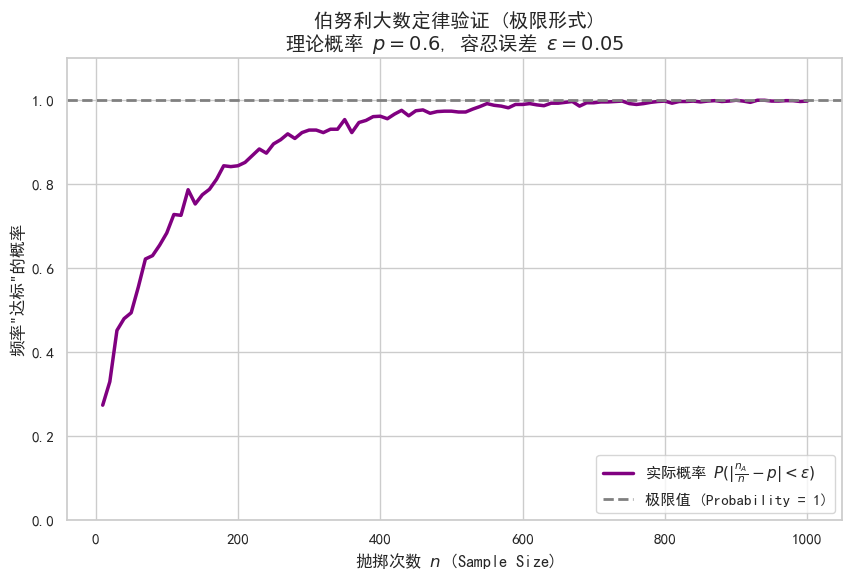

图2已保存: Mathematical_statistics/images/伯努利大数定律_分布演变_Violin.png


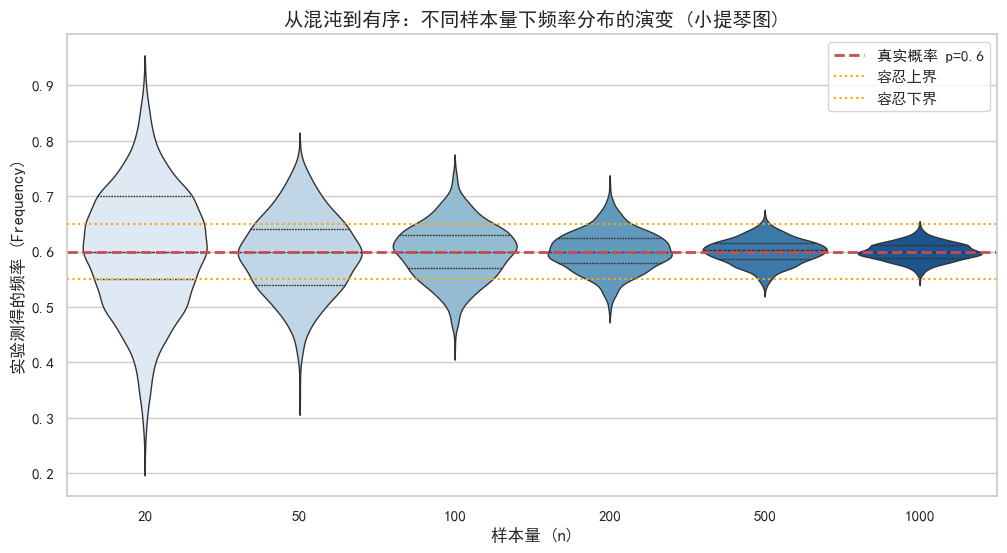

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # 引入 Pandas 为了方便画小提琴图

# ==========================================
# 0. 准备工作 & 设定参数
# ==========================================
np.random.seed(2024) # 换个种子

# 1. 设定伯努利试验的“真理”
true_p = 0.6  # 假设正面朝上的概率是 0.6

# 2. 设定大数定律验证参数
epsilon = 0.05 # 容忍误差：频率在 [0.55, 0.65] 之间算命中
M_trials = 1000 # 每次模拟重复做 1000 轮

# 3. 设定样本量序列
# (A) 用于画验证曲线的稠密序列
n_dense = np.arange(10, 1010, 10) 
# (B) 用于画分布演变图(小提琴图)的稀疏关键点
n_milestones = [20, 50, 100, 200, 500, 1000]

print(f"理论概率 p = {true_p}")
print(f"容忍误差 epsilon = {epsilon}")

# ==========================================
# 1. 模拟计算 (Part A: 验证极限形式)
# ==========================================
probabilities = []

for n in n_dense:
    # 二项分布模拟: n=抛硬币次数, p=概率, size=重复实验次数
    # 得到的结果是“成功次数” (Counts)
    success_counts = np.random.binomial(n=n, p=true_p, size=M_trials)
    
    # 转化为“频率” (Frequencies)
    frequencies = success_counts / n
    
    # 判断是否命中目标范围
    hits = np.abs(frequencies - true_p) < epsilon
    
    # 计算命中概率
    prob = np.mean(hits)
    probabilities.append(prob)

# ==========================================
# 2. 模拟计算 (Part B: 收集分布数据)
# ==========================================
# 为了画漂亮的小提琴图，我们需要把数据整理成 DataFrame 格式
# 结构: [n值, 频率值]
violin_data = []

for n in n_milestones:
    # 重新生成该 n 下的实验数据
    counts = np.random.binomial(n=n, p=true_p, size=M_trials)
    freqs = counts / n
    
    # 把这 1000 个频率存起来
    for f in freqs:
        violin_data.append({'样本量 (n)': str(n), '观察频率': f})

# 转为 DataFrame
df_violin = pd.DataFrame(violin_data)

# ==========================================
# 3. 绘图 (可视化)
# ==========================================

# 设置全局风格
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set_theme(style="whitegrid", font='SimHei')

# --- 图 1：伯努利大数定律极限验证 (折线图) ---
plt.figure(figsize=(10, 6))

# Matplotlib 搭台 & 绘图 (这种简单线图 plt 直接画最快)
plt.plot(n_dense, probabilities, color='purple', linewidth=2.5, label=r'实际概率 $P(|\frac{n_A}{n} - p| < \epsilon)$')
plt.axhline(y=1.0, color='gray', linestyle='--', linewidth=2, label='极限值 (Probability = 1)')

# 修饰
plt.title(f'伯努利大数定律验证 (极限形式)\n理论概率 $p={true_p}$, 容忍误差 $\\epsilon={epsilon}$', fontsize=14)
plt.xlabel('抛掷次数 $n$ (Sample Size)', fontsize=12)
plt.ylabel('频率"达标"的概率', fontsize=12)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')

# 保存图 1
save_path_1 = "Mathematical_statistics/images/伯努利大数定律_极限验证.png"
plt.savefig(save_path_1, dpi=300, bbox_inches='tight')
print(f"图1已保存: {save_path_1}")
plt.show()


# --- 图 2：频率分布演变 (小提琴图) ---
# 这是你要的“美观形式”：展示数据如何收敛
plt.figure(figsize=(12, 6))

# Seaborn 唱戏
# x: 分组依据 (样本量 n)
# y: 数据分布 (频率)
# inner="quartile": 在肚子里画出四分位数线
# palette: 颜色渐变，越往后越深
# 修改前：
# sns.violinplot(data=df_violin, x='样本量 (n)', y='观察频率', palette="Blues", inner="quartile", linewidth=1)

# 修改后：(增加了 hue=... 和 legend=False)
sns.violinplot(
    data=df_violin, 
    x='样本量 (n)', 
    y='观察频率', 
    hue='样本量 (n)',  # 【新增】明确告诉它：颜色是由“样本量”决定的
    legend=False,      # 【新增】不需要图例（因为X轴标签已经说明了）
    palette="Blues", 
    inner="quartile", 
    linewidth=1
)

# Matplotlib 收尾
plt.axhline(y=true_p, color='r', linestyle='--', linewidth=2, label=f'真实概率 p={true_p}')
# 画出容忍误差的边界 (辅助理解)
plt.axhline(y=true_p + epsilon, color='orange', linestyle=':', label='容忍上界')
plt.axhline(y=true_p - epsilon, color='orange', linestyle=':', label='容忍下界')

plt.title('从混沌到有序：不同样本量下频率分布的演变 (小提琴图)', fontsize=14)
plt.ylabel('实验测得的频率 (Frequency)', fontsize=12)
plt.legend(loc='upper right')

# 保存图 2
save_path_2 = "Mathematical_statistics/images/伯努利大数定律_分布演变_Violin.png"
plt.savefig(save_path_2, dpi=300, bbox_inches='tight')
print(f"图2已保存: {save_path_2}")
plt.show()

In [ ]:
### 2.3. 辛钦大数定律

In [ ]:
# 辛钦大数定律

In [66]:
print('''
步骤,关键操作,目的
1. 分布,使用 Pareto(α=1.5)（帕累托分布）,制造“期望存在，方差无穷”的极端环境
2. 变量,n→∞,辛钦定律生效的前提
3. 计算,算术平均值 Xˉn​,观察均值如何抵抗极端值的干扰
4. 判定,$,\\bar{X}_n - \\mu
5. 视觉,概率曲线 + 轨迹跳跃图,直观感受“无限方差”被“大样本”驯服的过程
''')


步骤,关键操作,目的
1. 分布,使用 Pareto(α=1.5),制造“期望存在，方差无穷”的极端环境
2. 变量,n→∞,辛钦定律生效的前提
3. 计算,算术平均值 Xˉn​,观察均值如何抵抗极端值的干扰
4. 判定,$,\bar{X}_n - \mu
5. 视觉,概率曲线 + 轨迹跳跃图,直观感受“无限方差”被“大样本”驯服的过程



当前分布: Pareto(alpha=1.5)
理论期望: 3.0
理论方差: Infinity (无穷大)
正在进行辛钦大数定律模拟 (可能较慢)...
验证完成，图片已保存: Mathematical_statistics/images/辛钦大数定律_Pareto验证.png


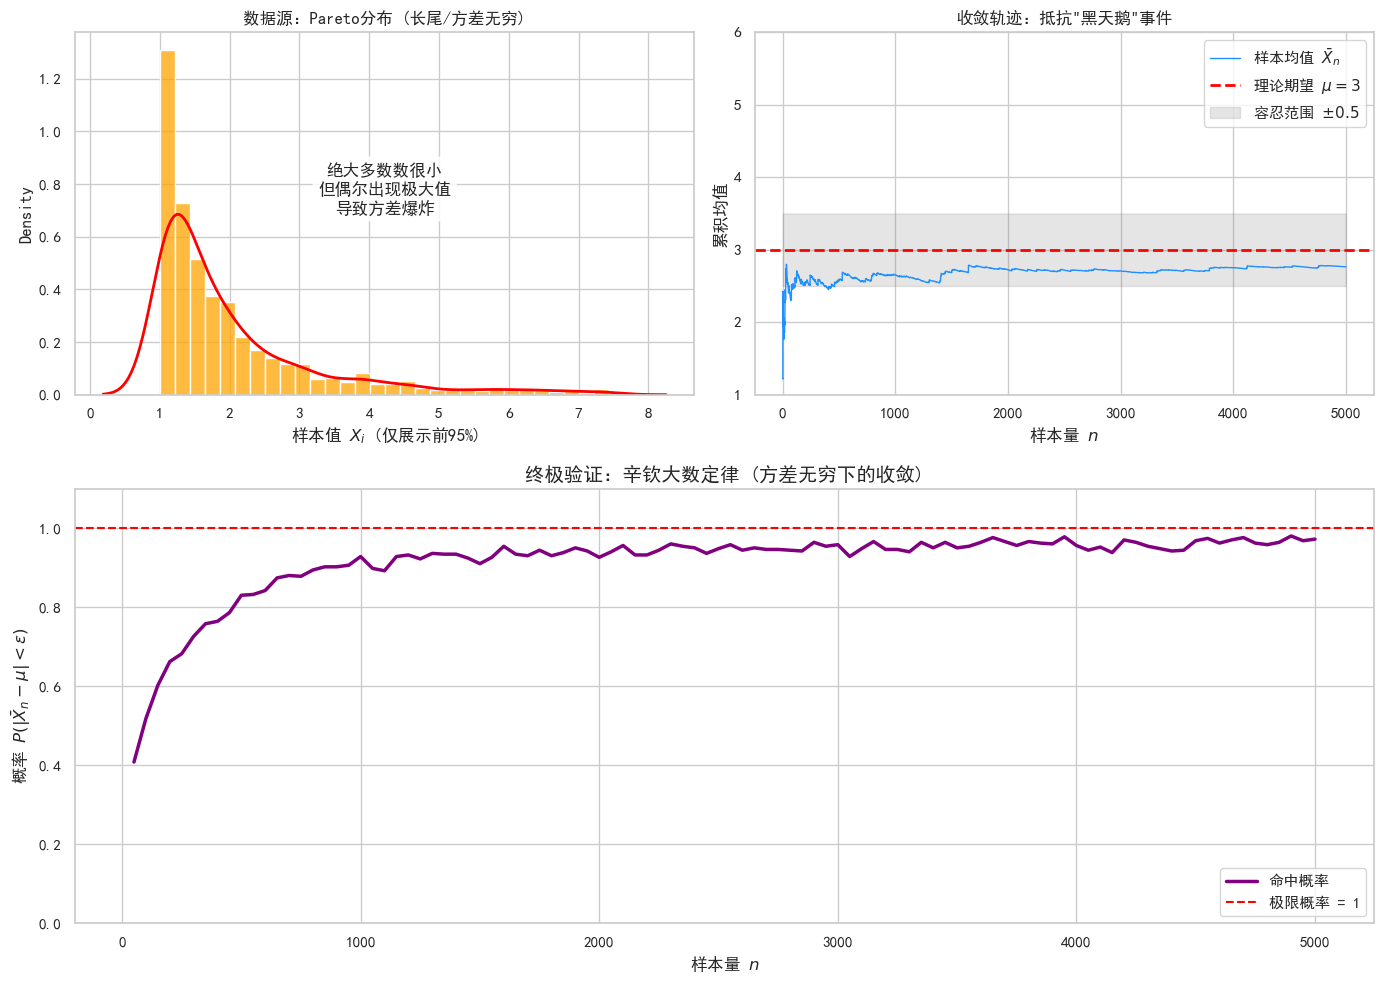

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 0. 准备工作：制造"方差无穷"的极端环境
# ==========================================
np.random.seed(42)

# 设定帕累托分布参数
# 形状参数 alpha (当 1 < alpha <= 2 时，期望存在，方差无穷)
alpha = 1.5 
xm = 1.0 # 尺度参数 (最小值)

# 理论期望 E(X) = (alpha * xm) / (alpha - 1)
theoretical_mean = (alpha * xm) / (alpha - 1) # = 3.0

# 设定验证参数
epsilon = 0.5 # 容忍误差 (目标范围 [2.5, 3.5])
max_n = 5000  # 辛钦定律通常需要更大的样本量才能看到收敛
M_trials = 500 # 蒙特卡洛模拟次数

print(f"当前分布: Pareto(alpha={alpha})")
print(f"理论期望: {theoretical_mean}")
print(f"理论方差: Infinity (无穷大)")

# ==========================================
# 1. 生成数据与模拟
# ==========================================

# --- A. 为了画左上图 (直方图) ---
# 生成一堆原始数据，展示"长尾"
raw_data_sample = (np.random.pareto(alpha, size=2000) + 1) * xm

# --- B. 为了画右上图 (单次轨迹) ---
# 生成一条长路径，观察均值是如何被极端值震荡的
single_path_data = (np.random.pareto(alpha, size=max_n) + 1) * xm
# 计算累积均值序列
running_means = np.cumsum(single_path_data) / np.arange(1, max_n + 1)

# --- C. 为了画下图 (概率收敛) ---
n_values = np.arange(50, max_n + 1, 50)
probabilities = []

print("正在进行辛钦大数定律模拟 (可能较慢)...")
for n in n_values:
    # 生成矩阵 (M_trials, n)
    # np.random.pareto 生成的是 x >= 0，标准 pareto 需要 +1 并 * xm
    samples = (np.random.pareto(alpha, size=(M_trials, n)) + 1) * xm
    
    # 求均值
    sample_means = np.mean(samples, axis=1)
    
    # 判定是否命中 [3-0.5, 3+0.5]
    success_count = np.sum(np.abs(sample_means - theoretical_mean) < epsilon)
    probabilities.append(success_count / M_trials)

# ==========================================
# 2. 绘图 (Storyboard Layout)
# ==========================================
# 设置风格
sns.set_theme(style="whitegrid", font='SimHei')
plt.rcParams['axes.unicode_minus'] = False

# 创建画布 (2行2列)
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2]) # 下面图稍高

ax1 = fig.add_subplot(gs[0, 0]) # 左上
ax2 = fig.add_subplot(gs[0, 1]) # 右上
ax3 = fig.add_subplot(gs[1, :]) # 下方

# --- 子图 1: 原始数据的长尾分布 ---
# 截取前95%的数据画图，否则因为极值太大，直方图会变成一条线
cutoff = np.percentile(raw_data_sample, 95)
sns.histplot(raw_data_sample[raw_data_sample < cutoff], bins=30, kde=False, color='orange', ax=ax1, stat='density')
# 画出KDE曲线
sns.kdeplot(raw_data_sample[raw_data_sample < cutoff], color='red', ax=ax1, linewidth=2)

ax1.set_title('数据源：Pareto分布 (长尾/方差无穷)', fontsize=12)
ax1.set_xlabel('样本值 $X_i$ (仅展示前95%)')
ax1.text(0.5, 0.5, "绝大多数数很小\n但偶尔出现极大值\n导致方差爆炸", 
         transform=ax1.transAxes, ha='center', bbox=dict(boxstyle="round", fc="white", alpha=0.8))


# --- 子图 2: 单次均值收敛的惊险轨迹 ---
ax2.plot(running_means, color='dodgerblue', linewidth=1, label='样本均值 $\\bar{X}_n$')
ax2.axhline(theoretical_mean, color='red', linestyle='--', linewidth=2, label='理论期望 $\\mu=3$')
# 画出容忍通道
ax2.fill_between(range(max_n), theoretical_mean - epsilon, theoretical_mean + epsilon, 
                 color='gray', alpha=0.2, label=f'容忍范围 $\\pm {epsilon}$')

ax2.set_title('收敛轨迹：抵抗"黑天鹅"事件', fontsize=12)
ax2.set_xlabel('样本量 $n$')
ax2.set_ylabel('累积均值')
ax2.set_ylim(1, 6) # 限制Y轴，因为可能有瞬间的巨大跳跃
ax2.legend(loc='upper right')

# --- 子图 3: 辛钦定律验证 (概率收敛) ---
ax3.plot(n_values, probabilities, color='purple', linewidth=2.5, label='命中概率')
ax3.axhline(1.0, color='red', linestyle='--', label='极限概率 = 1')

ax3.set_title(f'终极验证：辛钦大数定律 (方差无穷下的收敛)', fontsize=14)
ax3.set_ylabel(r'概率 $P(|\bar{X}_n - \mu| < \varepsilon)$', fontsize=12)
ax3.set_xlabel('样本量 $n$', fontsize=12)
ax3.legend(loc='lower right')
ax3.set_ylim(0, 1.1)

# ==========================================
# 3. 保存
# ==========================================
plt.tight_layout()
save_path = "Mathematical_statistics/images/辛钦大数定律_Pareto验证.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"验证完成，图片已保存: {save_path}")

plt.show()

In [ ]:
## 3.中心极限定理
### 3.1. 列维-林德伯格中心极限定理
### 3.2. 棣莫弗-拉普拉斯中心极限定理

In [ ]:
# 列维-林德伯格中心极限定理

In [71]:
print('''
步骤,变量/动作,含义
1. 设定,"总体 = 指数分布 (μ=1,σ=1)",制造一个“非常不正态”的起点
2. 变量,"n=[1,2,5,30,100]",模拟样本量逐渐变大的过程
3. 计算,抽 n 个 → 算均值 → 标准化,将不同量纲的均值统一转化为 Z 分数
4. 绘图,直方图 + 标准正态曲线,视觉验证：看形状是否重合
5. 检验,Q-Q 图,统计验证：看尾部是否合规
''')


步骤,变量/动作,含义
1. 设定,"总体 = 指数分布 (μ=1,σ=1)",制造一个“非常不正态”的起点
2. 变量,"n=[1,2,5,30,100]",模拟样本量逐渐变大的过程
3. 计算,抽 n 个 → 算均值 → 标准化,将不同量纲的均值统一转化为 Z 分数
4. 绘图,直方图 + 标准正态曲线,视觉验证：看形状是否重合
5. 检验,Q-Q 图,统计验证：看尾部是否合规



In [ ]:
# Q-Q图 从数学计算上利用了相关性原理，但统计学目的完全不同
# 它是用来**检验数据是否服从某种分布（如正态分布）**的，而不是看两个变量之间有没有关系的。
# 正态分布和指数分布的Q-Q图对比演示

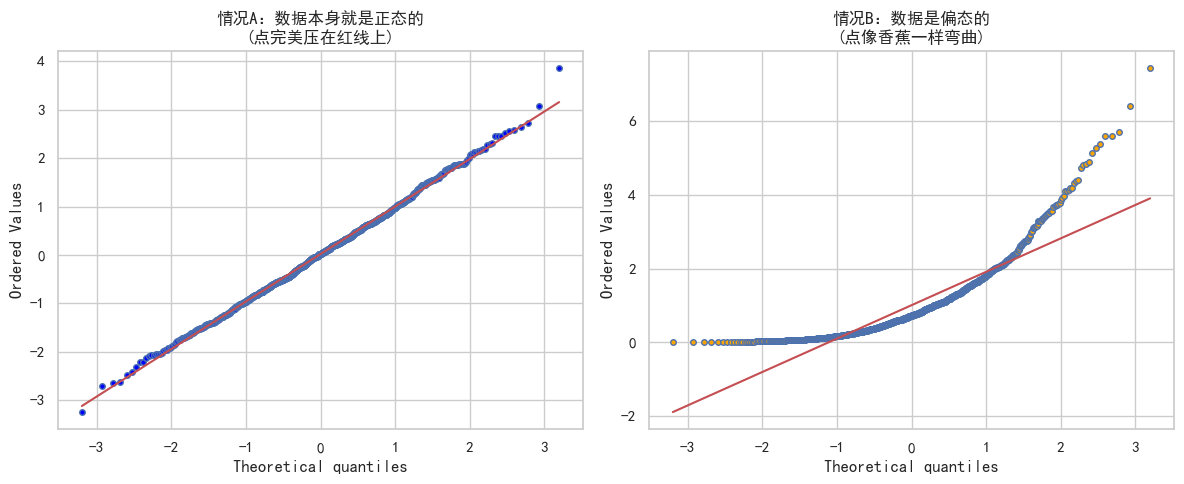

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # 专门用于统计检验的库

# 1. 制造两种数据
np.random.seed(42)
# A. 完美的正态分布数据 (优等生)
data_normal = np.random.normal(0, 1, 1000)
# B. 严重的指数分布数据 (偏科生)
data_exp = np.random.exponential(1, 1000)

# 2. 绘图对比
plt.figure(figsize=(12, 5))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 左图：正态数据的 Q-Q 图 ---
ax1 = plt.subplot(1, 2, 1)
# stats.probplot 自动计算分位数并画图
# dist="norm" 表示我们要对比的标准是正态分布
stats.probplot(data_normal, dist="norm", plot=ax1)
ax1.set_title("情况A：数据本身就是正态的\n(点完美压在红线上)")
ax1.get_lines()[0].set_markerfacecolor('blue')
ax1.get_lines()[0].set_markersize(4)

# --- 右图：指数数据的 Q-Q 图 ---
ax2 = plt.subplot(1, 2, 2)
stats.probplot(data_exp, dist="norm", plot=ax2)
ax2.set_title("情况B：数据是偏态的\n(点像香蕉一样弯曲)")
ax2.get_lines()[0].set_markerfacecolor('orange')
ax2.get_lines()[0].set_markersize(4)

plt.tight_layout()
plt.show()

正在生成数据并进行标准化...
验证完成，图片已保存: Mathematical_statistics/images/CLT_验证_HybridStyle.png


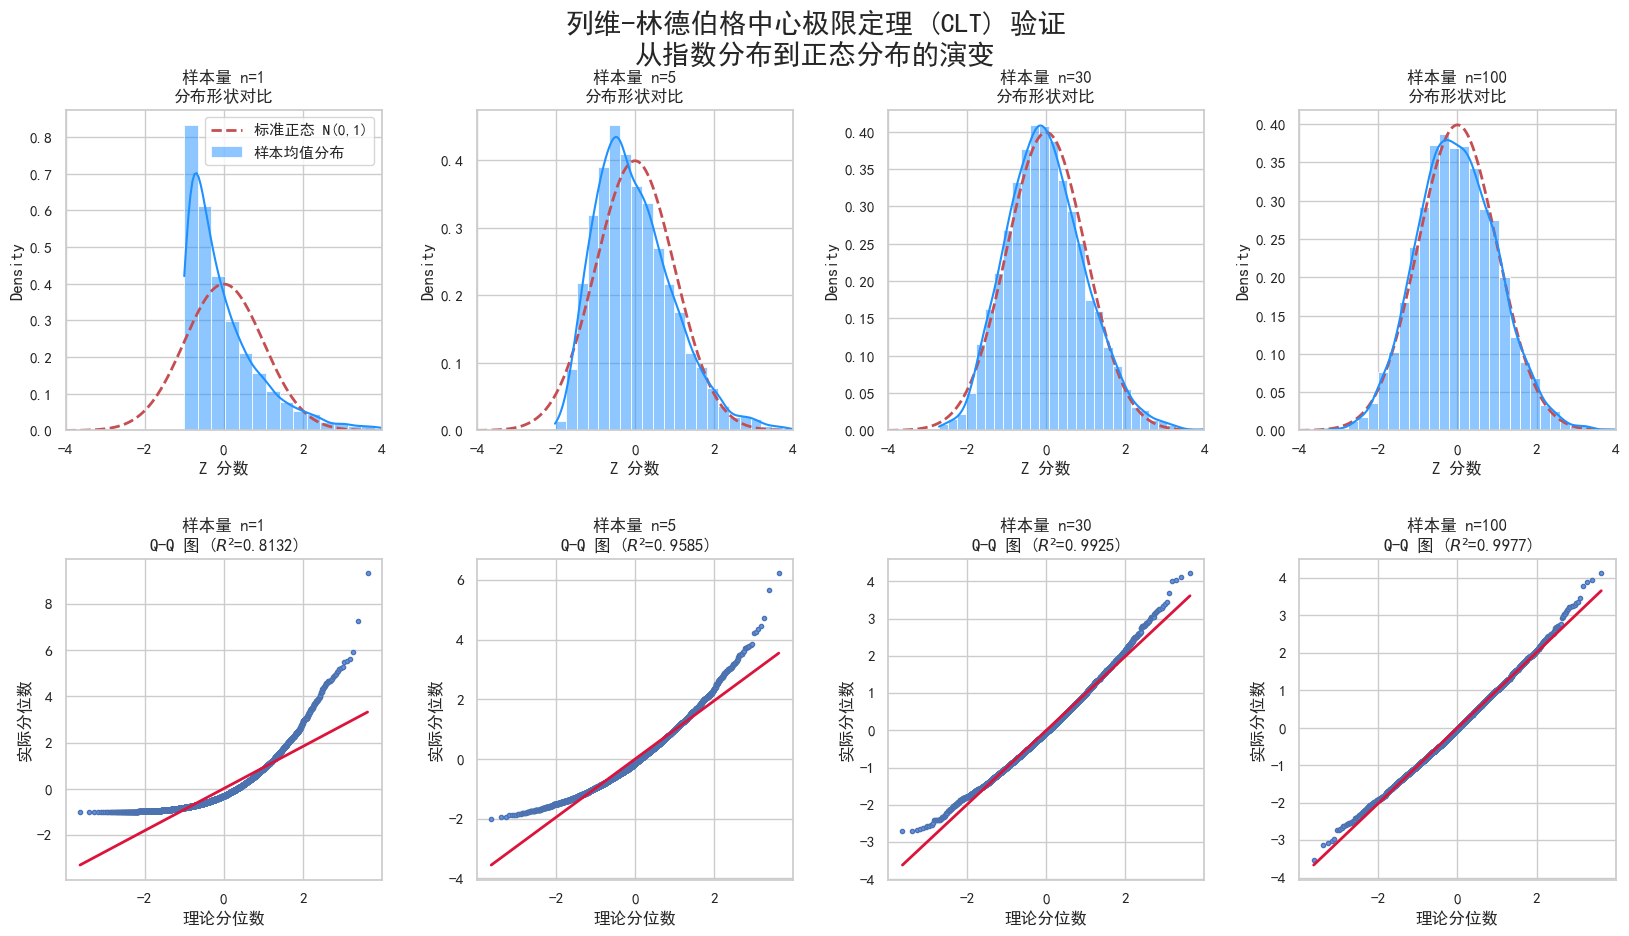

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Q-Q图需要用到

# ==========================================
# 0. 数据准备 (Data Preparation)
# ==========================================
np.random.seed(2024)

# 1. 定义总体：使用极度偏斜的指数分布 (Exponential)
#    均值 mu = 1, 标准差 sigma = 1
lam = 1.0
pop_mu = 1.0
pop_sigma = 1.0

# 2. 定义模拟参数
n_values = [1, 5, 30, 100]  # 观察样本量从 1 到 100 的变化
M_trials = 5000             # 模拟次数 (生成的点越多，图越平滑)

# 3. 预计算所有数据 (Simulation Loop)
#    我们要把不同 n 下的标准化均值(Z-score)先算出来存好
#    这样绘图部分的代码就会非常纯粹
z_data_store = {} # 字典用于存储不同 n 的数据

print("正在生成数据并进行标准化...")

for n in n_values:
    # 抽样: 生成 (M_trials, n) 的矩阵
    samples = np.random.exponential(scale=1/lam, size=(M_trials, n))
    
    # 计算样本均值
    sample_means = np.mean(samples, axis=1)
    
    # 核心步骤：标准化 (Standardization)
    # Z = (X_bar - mu) / (sigma / sqrt(n))
    std_error = pop_sigma / np.sqrt(n)
    z_scores = (sample_means - pop_mu) / std_error
    
    # 存入字典
    z_data_store[n] = z_scores

# 准备理论正态分布曲线的数据 (用于画红虚线)
x_theory = np.linspace(-4, 4, 1000)
y_theory = stats.norm.pdf(x_theory, 0, 1)

# ==========================================
# 绘图部分：应用“搭台 -> 唱戏 -> 收尾”模式
# ==========================================

# 设置全局字体 (Matplotlib 负责基础设施)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set_theme(style="whitegrid", font='SimHei') 

# ------------------------------------------
# 全景图：2行4列 (直方图 + Q-Q图)
# ------------------------------------------

# 1. Matplotlib 搭台 (创建大画布和子图网格)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3) # 调整子图间距

# 遍历每一个 n 值，填充对应的子图
for i, n in enumerate(n_values):
    # 取出准备好的数据
    z_scores = z_data_store[n]
    
    # === 第一行：直方图与密度曲线 (Visual Shape) ===
    ax_hist = axes[0, i] # 获取第1行第i列的子图
    
    # [Matplotlib 辅助] 先画出标准的 N(0,1) 红线作为参照
    ax_hist.plot(x_theory, y_theory, 'r--', linewidth=2, label='标准正态 N(0,1)')
    
    # [Seaborn 唱戏] 绘制核心分布图
    # stat='density' 确保面积归一化
    sns.histplot(z_scores, stat='density', bins=30, kde=True, 
                 color='dodgerblue', edgecolor='white', alpha=0.5, ax=ax_hist, label='样本均值分布')
    
    # [Matplotlib 收尾] 修饰细节
    ax_hist.set_title(f'样本量 n={n}\n分布形状对比', fontsize=12)
    ax_hist.set_xlim(-4, 4)
    ax_hist.set_xlabel('Z 分数')
    if i == 0: ax_hist.legend(loc='upper right') # 只在第一张图显示图例

    # === 第二行：Q-Q 图 (Statistical Fit) ===
    ax_qq = axes[1, i] # 获取第2行第i列的子图
    
    # [Scipy/Matplotlib 唱戏] 画 Q-Q 图
    # stats.probplot 这是一个特例，它自带绘图功能，传入 plot=ax_qq 即可
    (osm, osr), (slope, intercept, r) = stats.probplot(z_scores, dist="norm", plot=ax_qq)
    
    # [Matplotlib 收尾] 美化 Q-Q 图的样式
    # stats.probplot 画出的图包含线对象，我们可以获取并修改它
    ax_qq.get_lines()[0].set_markerfacecolor('cornflowerblue') # 修改点的颜色
    ax_qq.get_lines()[0].set_markersize(3)
    ax_qq.get_lines()[1].set_color('crimson') # 修改回归线的颜色
    ax_qq.get_lines()[1].set_linewidth(2)
    
    ax_qq.set_title(f'样本量 n={n}\nQ-Q 图 ($R²$={r**2:.4f})', fontsize=12) # R²放到$R²$里面 当前字体可能不包含这个
    ax_qq.set_xlabel('理论分位数')
    ax_qq.set_ylabel('实际分位数')

# 最终整体收尾
fig.suptitle('列维-林德伯格中心极限定理 (CLT) 验证\n从指数分布到正态分布的演变', fontsize=20, y=0.98)

# 保存图片 (使用正斜杠路径)
save_path = "Mathematical_statistics/images/CLT_验证_HybridStyle.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"验证完成，图片已保存: {save_path}")

plt.show()

In [ ]:
# 棣莫弗-拉普拉斯中心极限定理

In [ ]:
print('''
步骤,变量/动作,含义
1. 设定,"总体 = 二项分布 (p=0.9)",制造一个典型的“离散阶梯”起点
2. 变量,"n=[10, 50, 200]",观察随试验次数增加，“阶梯”逐渐变细密的过程
3. 绘图,"离散直方图 + 连续正态曲线",视觉验证：看离散柱子的轮廓是否被光滑曲线完美包络
4. 实例,"工厂模拟 (n=200, 目标[170,190])",在大样本具体场景下，进行大规模蒙特卡洛实验
5. 对比,"模拟值 vs 精确值 vs 近似值",数值验证：证明(带连续性修正的)正态近似公式的极高精度
''')

正在生成二项分布进化数据...
正在生成工厂实例数据并计算概率...
验证完成，图片已保存: Mathematical_statistics/images/DeMoivre_Laplace_验证.png


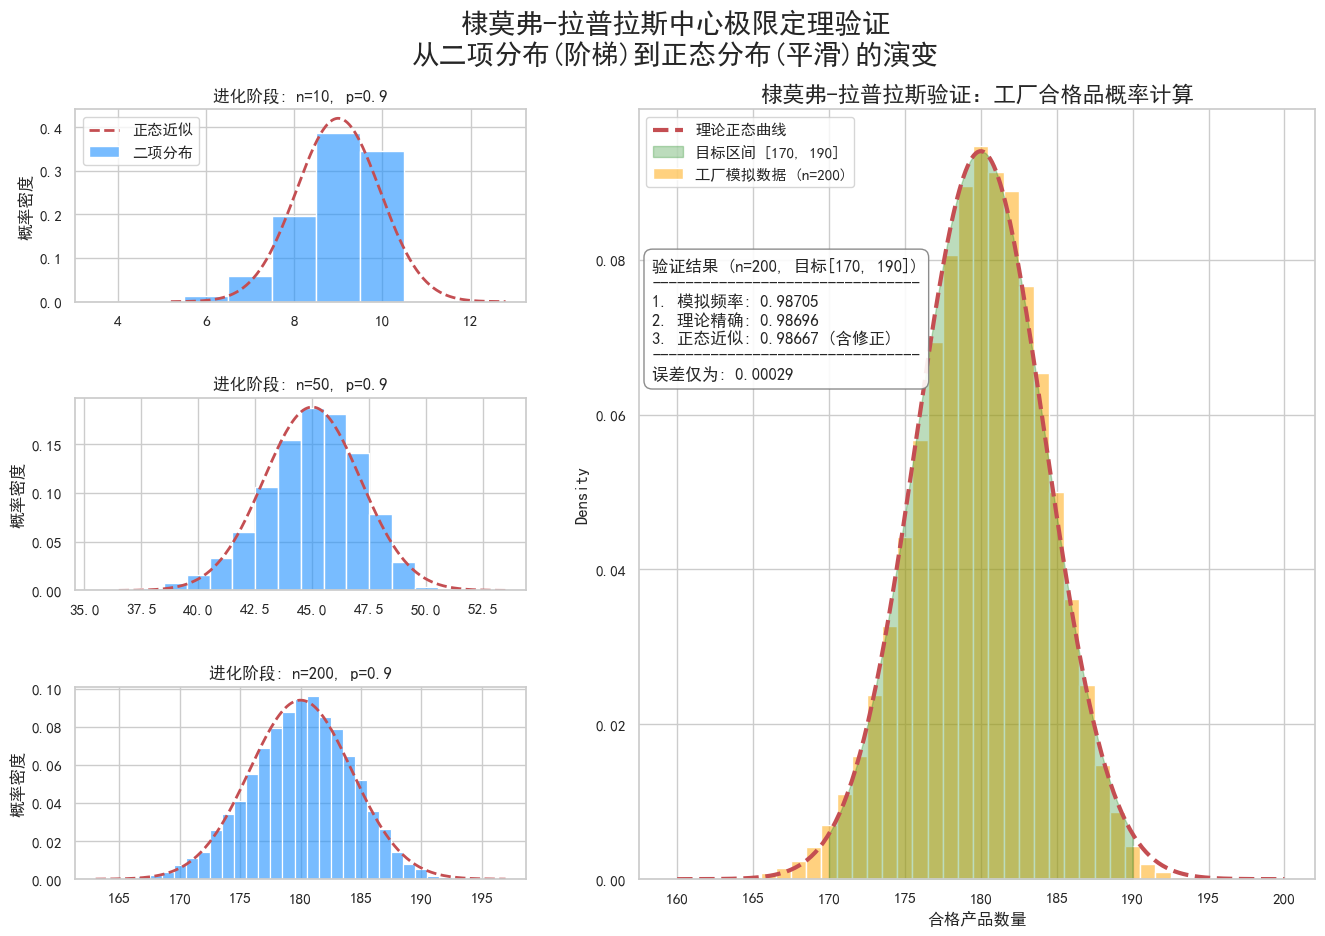

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ==========================================
# 0. 数据准备 (Data Preparation)
# ==========================================
np.random.seed(2024)

# 1. 定义总体参数：二项分布 B(n, p)
#    这里 p 固定，观察 n 变大的过程
p = 0.9           # 单次成功概率
n_evolution = [10, 50, 200] # 进化的三个阶段
M_trials = 10000  # 模拟次数

# 2. 预计算"形状进化"阶段的数据
#    存入字典，保持绘图代码纯粹
evolution_data = {}

print("正在生成二项分布进化数据...")
for n in n_evolution:
    # 模拟数据
    data = np.random.binomial(n=n, p=p, size=M_trials)
    
    # 计算理论正态分布参数 mu = np, sigma = sqrt(np(1-p))
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))
    
    # 生成理论曲线坐标
    x_theory = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
    y_theory = stats.norm.pdf(x_theory, mu, sigma)
    
    evolution_data[n] = {
        'data': data,
        'mu': mu,
        'sigma': sigma,
        'x_theory': x_theory,
        'y_theory': y_theory
    }

# 3. 预计算"工厂实例"阶段的数据 (n=200, 目标[170, 190])
print("正在生成工厂实例数据并计算概率...")
n_factory = 200
target_low, target_high = 170, 190
factory_trials = 100000 # 加大模拟量以求精确

# A. 模拟数据
factory_data = np.random.binomial(n=n_factory, p=p, size=factory_trials)

# B. 计算概率对比数据
# 1) 模拟频率
sim_prob = np.mean((factory_data >= target_low) & (factory_data <= target_high))

# 2) 理论精确值 (二项分布累积概率)
exact_prob = stats.binom.cdf(target_high, n_factory, p) - stats.binom.cdf(target_low - 1, n_factory, p)

# 3) 正态近似值 (带连续性修正)
mu_f = n_factory * p
sigma_f = np.sqrt(n_factory * p * (1 - p))
z2 = (target_high + 0.5 - mu_f) / sigma_f
z1 = (target_low - 0.5 - mu_f) / sigma_f
approx_prob = stats.norm.cdf(z2) - stats.norm.cdf(z1)

# ==========================================
# 绘图部分：应用“搭台 -> 唱戏 -> 收尾”模式
# ==========================================

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set_theme(style="whitegrid", font='SimHei') 

# ------------------------------------------
# 全景图布局：左侧3行(进化)，右侧1大列(实例)
# ------------------------------------------

# 1. Matplotlib 搭台
fig = plt.figure(figsize=(16, 10))
# gs = fig.add_gridspec(3, 2, width_ratios=[1, 1.5]) # 右边稍微宽一点
# 【修改点】：增加 hspace=0.4 (默认是None或0.2左右)
# hspace=0.4 意味着子图之间的垂直间距是子图高度的 40%
# wspace=0.2 意味着左右子图之间的间距是宽度的 20%
gs = fig.add_gridspec(3, 2, width_ratios=[1, 1.5], hspace=0.5, wspace=0.2)

# --- Part 1: 左侧形状进化 (Shape Evolution) ---
for i, n in enumerate(n_evolution):
    # 获取子图对象
    ax = fig.add_subplot(gs[i, 0])
    
    # 取出预计算的数据
    pkg = evolution_data[n]
    
    # [Matplotlib 辅助] 画理论正态曲线
    ax.plot(pkg['x_theory'], pkg['y_theory'], 'r--', linewidth=2, label='正态近似')
    
    # [Seaborn 唱戏] 画二项分布直方图
    # discrete=True 是关键，展示二项分布的"阶梯感"
    sns.histplot(pkg['data'], discrete=True, stat='density', 
                 color='dodgerblue', alpha=0.6, ax=ax, label='二项分布')
    
    # [Matplotlib 收尾]
    ax.set_title(f'进化阶段: n={n}, p={p}', fontsize=12)
    ax.set_ylabel('概率密度')
    if i == 0: ax.legend(loc='upper left') # 只在第一张图显示图例

# --- Part 2: 右侧工厂实例 (Factory Case) ---
ax_right = fig.add_subplot(gs[:, 1])

# [Seaborn 唱戏] 工厂数据分布
sns.histplot(factory_data, discrete=True, stat='density', 
             color='orange', alpha=0.5, ax=ax_right, label='工厂模拟数据 (n=200)')

# [Matplotlib 辅助] 理论正态曲线
x_f = np.linspace(160, 200, 300)
y_f = stats.norm.pdf(x_f, mu_f, sigma_f)
ax_right.plot(x_f, y_f, 'r--', linewidth=3, label='理论正态曲线')

# [Matplotlib 辅助] 填充目标区域 [170, 190]
x_fill = np.linspace(target_low, target_high, 100)
y_fill = stats.norm.pdf(x_fill, mu_f, sigma_f)
ax_right.fill_between(x_fill, y_fill, color='forestgreen', alpha=0.3, label='目标区间 [170, 190]')

# [Matplotlib 收尾] 添加结果文本框
result_text = (
    f"验证结果 (n={n_factory}, 目标[{target_low}, {target_high}])\n"
    f"--------------------------------\n"
    f"1. 模拟频率: {sim_prob:.5f}\n"
    f"2. 理论精确: {exact_prob:.5f}\n"
    f"3. 正态近似: {approx_prob:.5f} (含修正)\n"
    f"--------------------------------\n"
    f"误差仅为: {abs(exact_prob - approx_prob):.5f}"
)
ax_right.text(0.02, 0.65, result_text, transform=ax_right.transAxes, 
              fontsize=12, family='SimHei',
              bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round,pad=0.5'))

ax_right.set_title('棣莫弗-拉普拉斯验证：工厂合格品概率计算', fontsize=16)
ax_right.set_xlabel('合格产品数量')
ax_right.legend(loc='upper left')

# 最终整体收尾
fig.suptitle('棣莫弗-拉普拉斯中心极限定理验证\n从二项分布(阶梯)到正态分布(平滑)的演变', fontsize=20, y=0.98)

# 保存图片
save_path = "Mathematical_statistics/images/DeMoivre_Laplace_验证.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"验证完成，图片已保存: {save_path}")

plt.show()